In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# './config_bdd50K.csv' # ./config_bdd50K.csv' # './config_bdd.csv' # 
TUXML_CSV_FILENAME= './config_bdd50K.csv' # "/mnt/temp_dd/igrida-fs1/macher/config_bdd30To102K.csv" # "config_bdd83K.csv" # 'config_bdd1K.csv' # # "./config_bdd.csv" # 

# sanity check CSV
with open(TUXML_CSV_FILENAME, "r") as file:
    k = file.readline()
    t = k.split(",")
    s = set(t)
    assert(len(t) == len(s)) # unique number of options/features/column names

# parsing for real with pandas 
rawtuxdata = pd.read_csv(open(TUXML_CSV_FILENAME, "r"))

basic_head = ["cid", "time", "date"] # "compile"
size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]


### basic stats about options and remove of unique values 
## could be improved 

tri_state_values = ['y', 'n', 'm']

ftuniques = []
freq_ymn_features = []
non_tristate_options = []

for col in rawtuxdata:
    ft = rawtuxdata[col]    
    # eg always "y"
    if len(ft.unique()) == 1:
        ftuniques.append(col)
    # only tri-state values (y, n, m) (possible TODO: handle numerical/string options)    
    elif all(x in tri_state_values for x in ft.unique()):     #len(ft.unique()) == 3: 
        freq = ft.value_counts(normalize=True)
        freqy = 0
        freqn = 0
        freqm = 0
        if ('y' in freq.index):
            freqy = freq['y']
        if ('n' in freq.index):
            freqn = freq['n']
        if ('m' in freq.index):
            freqm = freq['m']
        freq_ymn_features.append((col, freqy, freqm, freqn))
    else:
        if not (col in size_methods): 
            non_tristate_options.append(col)
        

### TODO: we want to keep all quantitative values!
# non_tristate_options.remove('LZO') # ('vmlinux')

# we want to keep measurements (that are not tristate ;)) 
# non_tristate_options = list(set(non_tristate_options) - set(size_methods))

#### print options with unique values
# options with only one value eg always "y"
#i = 0
#for ft in ftuniques:
#    print(ft + " (" + str(i) + ")")
#    i = i + 1

print("Original size (#configs/#options) of the dataset " + str(rawtuxdata.shape))
print ("Number of options with only one value (eg always y): " + str(pd.DataFrame(ftuniques).shape))

# maybe we can drop options with only one unique value (no interest for machine learning)
# TODO: maybe we can rely on more traditional feature reduction techniques
# TODO: need to think about *when* to apply the removal 
rawtuxdata.drop(columns=ftuniques,inplace=True) 
## non_tristate_options include basic stuff like date, time, cid but also string/numerical options
print ("Non tri-state value options (eg string or integer or hybrid values): " 
       + str(pd.DataFrame(non_tristate_options).shape) + " ") 
#      + str(pd.DataFrame(non_tristate_options)))


print ("Predictor variables: " + str(rawtuxdata.drop(columns=non_tristate_options).columns.size))
# frequency of y, m, and n values 
#plt.figure()
#pd.DataFrame(freq_ymn_features, columns=["feature", "freqy", "freqm", "freqn"]).plot(kind='hist', alpha=0.8) #plot()
#plt.show()


    



/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1150,2722,6015,6026,6717,7350,7676,7726,10442) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Original size (#configs/#options) of the dataset (47861, 12798)
Number of options with only one value (eg always y): (2971, 1)
Non tri-state value options (eg string or integer or hybrid values): (174, 1) 
Predictor variables: 9653


In [2]:
rawtuxdata['COMPILE_TEST'].value_counts()

y    24163
n    23698
Name: COMPILE_TEST, dtype: int64

In [3]:
# debugging some old entries
for k, v in rawtuxdata['LZO'].iteritems():
    if isinstance(v, str):
        print (rawtuxdata.loc[k]['cid'], v)

In [4]:
'X86_64' in ftuniques, 'DEBUG_INFO' in ftuniques, 'GCOV_PROFILE_ALL' in ftuniques, 'KASAN' in ftuniques, 'UBSAN_SANITIZE_ALL' in ftuniques, 'RELOCATABLE' in ftuniques, 'XFS_DEBUG' in ftuniques, 'AIC7XXX_BUILD_FIRMWARE' in ftuniques, 'AIC79XX_BUILD_FIRMWARE' in ftuniques, 'WANXL_BUILD_FIRMWARE' in ftuniques

(False, False, False, False, False, False, False, False, False, False)

In [5]:
# tinyconfig 
rawtuxdata['SLOB'].value_counts(), rawtuxdata['CC_OPTIMIZE_FOR_SIZE'].value_counts(), rawtuxdata['OPTIMIZE_INLINING'].value_counts()

(n    47520
 y      341
 Name: SLOB, dtype: int64, n    47409
 y      452
 Name: CC_OPTIMIZE_FOR_SIZE, dtype: int64, y    24097
 n    23764
 Name: OPTIMIZE_INLINING, dtype: int64)

In [6]:
if 'RELOCATABLE' in rawtuxdata.columns:
    print(rawtuxdata.query("RELOCATABLE == 'y'")[['cid', 'RELOCATABLE']], rawtuxdata.query("RELOCATABLE == 'y'").shape)

         cid RELOCATABLE
1      30511           y
2      30512           y
3      30513           y
6      30516           y
14     30524           y
17     30527           y
21     30531           y
22     30532           y
25     30535           y
30     30540           y
34     30544           y
40     30550           y
41     30551           y
42     30552           y
43     30553           y
47     30557           y
50     30560           y
51     30561           y
55     30565           y
57     30567           y
58     30568           y
59     30569           y
60     30570           y
63     30573           y
65     30575           y
68     30578           y
69     30579           y
72     30582           y
73     30583           y
76     30586           y
...      ...         ...
47811  78862           y
47814  78865           y
47815  78866           y
47816  78867           y
47817  78868           y
47818  78869           y
47825  78876           y
47826  78877           y


In [7]:
print("Data exploration")

Data exploration


In [8]:
# BUGS EXPLORATION
def bug_exploration():
    rawtuxdata.query("AIC7XXX_BUILD_FIRMWARE == 'y'")[['cid', 'vmlinux']]
    rawtuxdata.query("AIC79XX_BUILD_FIRMWARE == 'y'")[['cid', 'vmlinux']]
    rawtuxdata.query("WANXL_BUILD_FIRMWARE == 'y'")[['cid', 'vmlinux']]
    rawtuxdata.query("GENERIC_ALLOCATOR == 'n' & DRM_VBOXVIDEO == 'y'")[['cid', 'vmlinux']]
    rawtuxdata.query("GENERIC_ALLOCATOR == 'y' & DRM_VBOXVIDEO == 'y'")[['cid', 'vmlinux']]
    rawtuxdata.query("GENERIC_ALLOCATOR == 'n' & DRM_VBOXVIDEO == 'm'")[['cid', 'vmlinux']]
    return rawtuxdata.query("DRM_VBOXVIDEO == 'y'")[['cid', 'vmlinux']]

#bug_exploration()





In [9]:
#rawtuxdata[rawtuxdata['X86_64'] == 'n']
#rawtuxdata.query("X86_64 == 'n'")

In [10]:
#rawtuxdata[(rawtuxdata['DEBUG_INFO'] == 'n') & (rawtuxdata['GCOV_PROFILE_ALL'] == 'n') & (rawtuxdata['KASAN'] == 'n') & (rawtuxdata['MODULES'] == 'y')]
# rawtuxdata.query("(DEBUG_INFO == 'n') & (GCOV_PROFILE_ALL == 'n') & (KASAN == 'n') & (MODULES == 'y')")
#rawtuxdata.query("(DEBUG_INFO == 'n') & (GCOV_PROFILE_ALL == 'n') & (KASAN == 'n')").shape, rawtuxdata.shape


In [11]:
#rawtuxdata[rawtuxdata['vmlinux'] == 1168072][['cid', 'CC_OPTIMIZE_FOR_SIZE', 'DEBUG_INFO_DWARF4', 'KASAN', 'UBSAN_ALIGNMENT', 'X86_NEED_RELOCS', 'RANDOMIZE_BASE', 'GCOV_PROFILE_ALL', 'UBSAN_SANITIZE_ALL', 'DEBUG_INFO', 'MODULES', 'DEBUG_INFO_REDUCED', 'DEBUG_INFO_SPLIT']]
tiny_data = rawtuxdata.query("vmlinux == 1168072") #tiny config for X86_32
#if (len(tiny_data) > 0):
#    print(tiny_data[['cid', 'CC_OPTIMIZE_FOR_SIZE', 'DEBUG_INFO_DWARF4', 'KASAN', 'UBSAN_ALIGNMENT', 'X86_NEED_RELOCS', 'RANDOMIZE_BASE', 'GCOV_PROFILE_ALL', 'UBSAN_SANITIZE_ALL', 'DEBUG_INFO', 'MODULES', 'DEBUG_INFO_REDUCED', 'DEBUG_INFO_SPLIT']])

In [12]:
#rawtuxdata[rawtuxdata['vmlinux'] == -1]
rawtuxdata.query("vmlinux == -1")

,cid,date,time,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,...,SND_SOC_INTEL_SKL_NAU88L25_SSM4567_MACH,APDS9960,ARCH_SUPPORTS_INT128,SLABINFO,MICROCODE_AMD,ISDN_DRV_HISAX,CHARGER_BQ24190,SND_SOC_NAU8825,BH1750,NETWORK_FILESYSTEMS
189,30699,2018-06-11 11:45:45,580.167,-1,-1.0,-1,-1,-1.0,-1,-1,...,n,m,y,y,n,n,m,n,n,n
190,30700,2018-06-11 12:04:27,814.281,-1,-1.0,-1,-1,-1.0,-1,-1,...,n,n,y,y,y,n,m,m,m,y
194,30704,2018-06-11 16:28:46,318.957,-1,-1.0,-1,-1,-1.0,-1,-1,...,n,n,y,y,y,n,n,n,n,n
207,30717,2018-06-11 16:31:52,485.380,-1,-1.0,-1,-1,-1.0,-1,-1,...,m,m,y,y,y,n,m,m,n,y
208,30718,2018-06-11 16:31:58,228.473,-1,-1.0,-1,-1,-1.0,-1,-1,...,n,n,y,y,n,n,n,n,n,n
212,30722,2018-06-11 16:32:37,536.941,-1,-1.0,-1,-1,-1.0,-1,-1,...,m,n,y,n,y,n,y,m,n,y
216,30726,2018-06-11 16:34:29,282.212,-1,-1.0,-1,-1,-1.0,-1,-1,...,n,n,y,y,n,n,n,n,n,n
220,30730,2018-06-11 16:36:31,282.096,-1,-1.0,-1,-1,-1.0,-1,-1,...,n,n,y,n,y,n,n,n,y,n
221,30731,2018-06-11 16:36:42,315.862,-1,-1.0,-1,-1,-1.0,-1,-1,...,n,y,y,y,n,n,y,n,n,y
227,30737,2018-06-11 16:39:28,267.500,-1,-1.0,-1,-1,-1.0,-1,-1,...,n,n,y,y,n,n,y,n,n,n


In [13]:
#rawtuxdata[rawtuxdata['vmlinux'] == 1168072]['MODULES']
rawtuxdata.query("vmlinux == 1168072")['MODULES'] #tiny config for X86_32

25701    n
25702    n
25703    n
39716    n
39720    n
39729    n
39730    n
Name: MODULES, dtype: object

In [14]:
# playing a bit with the data 
rawtuxdata.dtypes
# 'DEBUG_INFOO' in list(pd.DataFrame(non_tristate_options)[0]) # 
# tuxdata['DEBUG_INFO'].unique()
#tuxdata['OUTPUT_FORMAT'].dtypes
#tuxdata['DEFAULT_HOSTNAME'].unique()

#rawtuxdata[:5]
rawtuxdata[:20]['vmlinux']
#tuxdata[:5]['CONFIG_DEBUG_INFO']
#tuxdata['ARCH_HAS_SG_CHAIN'].unique()
#tuxdata['ARCH_HAS_SG_CHAIN'].astype('category')

0      32937384
1     243146616
2      49857648
3      26847952
4      88797152
5      21660112
6     184978608
7      23617176
8      29446856
9      18013912
10     15099992
11    129488992
12     44323624
13     33382816
14    114426360
15     47171576
16     32392968
17     32405408
18     73707960
19     33166824
Name: vmlinux, dtype: int64

In [15]:
rawtuxdata.shape, rawtuxdata.query("vmlinux != -1").shape

((47861, 9827), (44858, 9827))

In [16]:
print("some configurations may have X86_32 (coz we have tested/tried some options and there are in the database)")
# we only keep X86_64 configurations
#rawtuxdata = rawtuxdata[rawtuxdata['X86_64'] == 'y'] ### TODO: I've impression it's not the most effective way (wrt memory) to filter 
if 'X86_64' in rawtuxdata.columns:
    print(rawtuxdata['X86_64'].describe())
    rawtuxdata.query("X86_64 == 'y'", inplace=True)
rawtuxdata.info(memory_usage='deep')

some configurations may have X86_32 (coz we have tested/tried some options and there are in the database)
count     47861
unique        2
top           y
freq      47846
Name: X86_64, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47846 entries, 0 to 47860
Columns: 9827 entries, cid to NETWORK_FILESYSTEMS
dtypes: float64(7), int64(148), object(9672)
memory usage: 28.5 GB


In [17]:
from sklearn.preprocessing import *
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import tree
import graphviz 


LEARN_COMPILATION_SUCCESS = True # costly in time and space 
compilation_status_column_name = 'compile_success'

def encode_data_compilation(rawtuxdata):
    lae = LabelEncoder()
    # we save quantitative values we want (here vmlinux, TODO: generalize)
    # the key idea is that the labelling encoder should not be applied to this kind of values (only to predictor variables!)
    # vml = rawtuxdata['LZO'] # rawtuxdata['vmlinux'] 
    o_sizes = rawtuxdata[size_methods]

    # we remove non tri state options, but TODO there are perhaps some interesting options (numerical or string) here
    #tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=['vmlinux']).apply(le.fit_transform)
    tuxdata_for_compilation = rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(lae.fit_transform)

    #tuxdata['vmlinux'] = vml 
    tuxdata_for_compilation[size_methods] = o_sizes
    # we can ue vmlinux since it has been restored thanks to previous line
    tuxdata_for_compilation[compilation_status_column_name] = tuxdata_for_compilation['vmlinux'] != -1
    return tuxdata_for_compilation

def learn_compilation_success(tuxdata_for_compilation):
    TESTING_SIZE=0.3 
    X_train, X_test, y_train, y_test = train_test_split(tuxdata_for_compilation.drop(columns=size_methods).drop(columns=compilation_status_column_name), tuxdata_for_compilation[compilation_status_column_name], test_size=TESTING_SIZE, random_state=0)  
    clf = tree.DecisionTreeClassifier() #GradientBoostingClassifier(n_estimators=100) #RandomForestRegressor(n_estimators=100) #   #GradientBoostingRegressor(n_estimators=100)  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]    

    TOP_FT_IMPORTANCE=20
    print("Feature ranking: " + "top (" + str(TOP_FT_IMPORTANCE) + ")")
    for f in range(TOP_FT_IMPORTANCE): # len(indices)
        print("%d. feature %s %d (%f)" % (f + 1, tuxdata_for_compilation.columns[indices[f]], indices[f], importances[indices[f]]))
   
    
    dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=tuxdata_for_compilation.drop(columns=size_methods).drop(columns=compilation_status_column_name).columns,  
                         filled=True, rounded=True,
                         special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.render("TUXML compilation sucess")
    
    acc = accuracy_score (y_test, y_pred)
    prec = precision_score (y_test, y_pred)
    reca = recall_score (y_test, y_pred)
    f1 = f1_score (y_test, y_pred)
    print("Accuracy score: %.2f" % (acc))
    print("Precision score: %.2f" % (prec))
    print("Recall score: %.2f" % (reca))
    print("F1 score: %.2f" % (f1))

if (LEARN_COMPILATION_SUCCESS):
    tuxdata_for_compilation = encode_data_compilation(rawtuxdata)
    tuxdata_for_compilation [compilation_status_column_name].describe()
    learn_compilation_success(tuxdata_for_compilation)
    del tuxdata_for_compilation

Feature ranking: top (20)
1. feature AIC79XX_BUILD_FIRMWARE 2011 (0.454763)
2. feature AIC7XXX_BUILD_FIRMWARE 1426 (0.313051)
3. feature WANXL_BUILD_FIRMWARE 8087 (0.126378)
4. feature DRM_VBOXVIDEO 6136 (0.060476)
5. feature IPV6 1420 (0.006297)
6. feature IPV6_TUNNEL 4061 (0.005629)
7. feature GENERIC_ALLOCATOR 9122 (0.004741)
8. feature FORTIFY_SOURCE 4081 (0.003865)
9. feature UBSAN_SANITIZE_ALL 2144 (0.003321)
10. feature BITREVERSE 6228 (0.001326)
11. feature SPI_BUTTERFLY 276 (0.001231)
12. feature PARIDE_EPIA 2362 (0.000998)
13. feature IR_JVC_DECODER 4888 (0.000958)
14. feature MEDIA_CONTROLLER_DVB 3946 (0.000920)
15. feature DEBUG_INFO 4361 (0.000670)
16. feature FB_SYS_COPYAREA 2514 (0.000635)
17. feature PPDEV 622 (0.000629)
18. feature AD7766 4249 (0.000603)
19. feature AHCI_IMX 7323 (0.000502)
20. feature BLK_DEV_AEC62XX 7464 (0.000501)
Accuracy score: 1.00
Precision score: 1.00
Recall score: 1.00
F1 score: 1.00


In [18]:
#rawtuxdata.query("vmlinux == -1")[['cid', 'AIC7XXX_BUILD_FIRMWARE', 'AIC79XX_BUILD_FIRMWARE', 'IPVTAP', 'WANXL_BUILD_FIRMWARE', 'TCIC']]


In [19]:
# aka MAPE
def mean_relative_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [20]:
# remove entries with same configurations
print(str(len(rawtuxdata)) + " before the removal of some entries (those with same configurations)")
# tuxdata.drop_duplicates(subset=tuxdata.columns.difference(['vmlinux']), inplace=True)
rawtuxdata.drop_duplicates(subset=rawtuxdata.columns.difference(size_methods).difference(basic_head), inplace=True)
print(str(len(rawtuxdata)) + " after the removal of some entries (those with same configurations)")

#n_failures = len(tuxdata[~np.isnan(tuxdata['vmlinux'])])
#n_failures = len(rawtuxdata.query("vmlinux != -1")) #len(tuxdata[np.isnan(tuxdata['vmlinux'])])
#print(str(n_failures) + " non-failures out of " + str(len(rawtuxdata)))

#tuxdata = tuxdata[~np.isnan(tuxdata['vmlinux'])]
#rawtuxdata = rawtuxdata[rawtuxdata['vmlinux'] != -1] #tuxdata[~np.isnan(tuxdata['vmlinux'])]
rawtuxdata.query("(vmlinux != -1) & (vmlinux != 0)", inplace=True)
print(str(len(rawtuxdata)) + " after the removal of configurations that do NOT compile")


47846 before the removal of some entries (those with same configurations)
47793 after the removal of some entries (those with same configurations)
44810 after the removal of configurations that do NOT compile


In [21]:
rawtuxdata.query("vmlinux == 1168072") # tinyconfig with X86_32

,cid,date,time,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,...,SND_SOC_INTEL_SKL_NAU88L25_SSM4567_MACH,APDS9960,ARCH_SUPPORTS_INT128,SLABINFO,MICROCODE_AMD,ISDN_DRV_HISAX,CHARGER_BQ24190,SND_SOC_NAU8825,BH1750,NETWORK_FILESYSTEMS


In [22]:
rawtuxdata.query("vmlinux == 7317008") # tiny config for X86_64

,cid,date,time,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,...,SND_SOC_INTEL_SKL_NAU88L25_SSM4567_MACH,APDS9960,ARCH_SUPPORTS_INT128,SLABINFO,MICROCODE_AMD,ISDN_DRV_HISAX,CHARGER_BQ24190,SND_SOC_NAU8825,BH1750,NETWORK_FILESYSTEMS
43411,74458,2018-07-05 16:07:21,28.7108,7317008,646608.0,2733176,501222,4722128.0,6808144,458568,...,n,n,y,n,n,n,n,n,n,n


<Figure size 432x288 with 0 Axes>

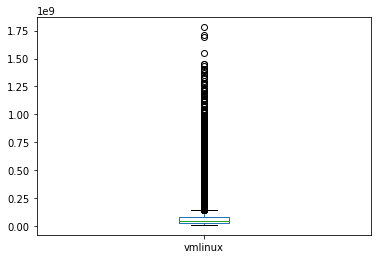

<Figure size 432x288 with 0 Axes>

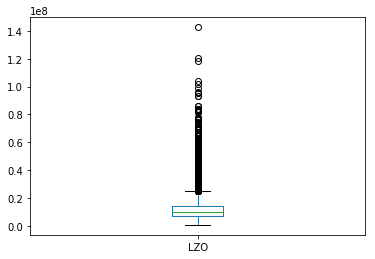

<Figure size 432x288 with 0 Axes>

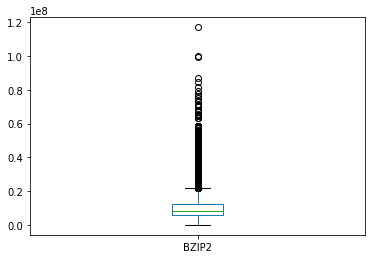

count    4.481000e+04
mean     7.168275e+07
std      9.516868e+07
min      7.317008e+06
25%      2.891390e+07
50%      4.362822e+07
75%      7.386492e+07
max      1.780630e+09
Name: vmlinux, dtype: float64

In [23]:
plt.figure()
pd.DataFrame(rawtuxdata['vmlinux']).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(rawtuxdata['LZO']).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(rawtuxdata['BZIP2']).plot.box()
plt.show(block=False)


rawtuxdata['vmlinux'].describe()


In [24]:
rawtuxdata['vmlinux'].sort_values()[:100]

43411     7317008
254      10707344
24421    10786744
19082    10790352
44673    10856456
12603    10870272
15435    10908568
1358     10916624
4116     10963928
27854    10994728
37961    11035016
30198    11044640
867      11062640
27877    11064288
34294    11098984
37179    11100872
47736    11120888
36695    11123472
9616     11136848
33084    11150720
43729    11168320
6873     11179184
24690    11196384
26128    11211896
25362    11225896
20664    11231688
26208    11246432
17664    11255832
37631    11264264
22394    11278048
           ...   
18761    11626328
5910     11631304
44191    11655584
42661    11662056
3068     11666312
26803    11678640
21226    11680280
6307     11692152
29237    11696032
21299    11699264
7715     11702120
44898    11732424
16798    11746560
25344    11750696
15591    11763560
38164    11777968
19137    11786864
8160     11791160
26926    11796880
19325    11805320
1194     11820880
45943    11839768
26950    11890560
16825    11896168
44424    1

In [25]:
import scipy.stats
import seaborn as sns



def color_negative_positive(val, pcolor="green", ncolor="red"):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = pcolor if val > 0 else ncolor 
    if val == 0:
        color = 'black' 
    return 'color: %s' % color

compress_methods = ["GZIP", "BZIP2", "LZMA", "XZ", "LZO", "LZ4"]
def compareCompress(size_measure_of_interest): #"" # "-vmlinux" #"-bzImage" # prefix
    rCompressDiff = pd.DataFrame(index=list(map(lambda c: c + "o", compress_methods)) , columns=compress_methods) 
    for compress_method in compress_methods:
        for compress_method2 in compress_methods:
            rCompressDiff.loc[compress_method + "o"][compress_method2] = (np.mean(rawtuxdata[compress_method + size_measure_of_interest] / rawtuxdata[compress_method2 + size_measure_of_interest]) * 100) - 100
    return rCompressDiff

#cmy = sns.light_palette("red", as_cmap=True)
compareCompress("").style.set_caption('Difference (average in percentage) per compression methods').applymap(color_negative_positive)

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,2.89031,25.1904,39.4155,-10.3508,-16.5115
BZIP2o,-2.72232,0,21.7857,35.5792,-12.8373,-18.8481
LZMAo,-20.0471,-17.7367,0,11.3729,-28.2866,-33.1977
XZo,-18710.6,-18708.5,-18692.5,0,-35.3765,-39.8028
LZOo,-35676.4,-35673.2,-35648.2,55.694,0,-6.90241
LZ4o,-38950.5,-38947.1,-38920.2,67.3762,7.43404,0


In [26]:
compareCompress("-bzImage").style.set_caption('Difference (average in percentage) per compression methods, bzImage').applymap(color_negative_positive)


,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,-31.0038,24.7704,38.3709,-10.0245,-16.2196
BZIP2o,49.2548,0,85.6213,105.469,34.3935,25.1916
LZMAo,-19.7765,-44.8243,0,10.9064,-27.7806,-32.7367
XZo,-27.4018,-50.1448,-9.50308,0,-34.6541,-39.1392
LZOo,11.2245,-23.2002,38.8583,53.9707,0,-6.91492
LZ4o,19.5496,-17.4138,49.2967,65.541,7.44753,0


In [27]:
compareCompress("-vmlinux").style.set_caption('Difference (average in percentage) per compression methods, vmlinux').applymap(color_negative_positive)


,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,-26.1333,19.1487,28.891,-8.2208,-13.4588
BZIP2o,37.262,0,62.9152,75.9372,26.1427,19.0401
LZMAo,-15.9429,-38.1469,0,8.14512,-22.7964,-27.1736
XZo,-22.0773,-42.7539,-7.32697,0,-28.4258,-32.4784
LZOo,9.03454,-19.3539,30.02,40.6578,0,-5.73908
LZ4o,15.7389,-14.3237,38.0793,49.3865,6.10958,0


In [28]:
cm = sns.light_palette("green", as_cmap=True)
pd.DataFrame.corr(rawtuxdata[size_methods]).style.set_caption('Correlations between size measures').background_gradient(cmap=cm)


,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,LZMA-bzImage,LZMA-vmlinux,LZMA,XZ-bzImage,XZ-vmlinux,XZ,LZO-bzImage,LZO-vmlinux,LZO,LZ4-bzImage,LZ4-vmlinux,LZ4
vmlinux,1,0.485379,0.485404,0.484039,0.500344,0.500307,0.49917,0.474101,0.474135,0.472277,0.478756,0.478792,0.477509,0.501067,0.501266,0.500589,0.506997,0.50721,0.506625
GZIP-bzImage,0.485379,1,1,0.999906,0.99697,0.99661,0.99707,0.997697,0.997698,0.997542,0.993909,0.99391,0.993846,0.996927,0.996947,0.997083,0.993689,0.99371,0.993888
GZIP-vmlinux,0.485404,1,1,0.999906,0.996975,0.996615,0.997075,0.997695,0.997697,0.99754,0.993908,0.993909,0.993844,0.996932,0.996952,0.997087,0.993696,0.993717,0.993894
GZIP,0.484039,0.999906,0.999906,1,0.996724,0.996363,0.996977,0.99759,0.997591,0.997688,0.993895,0.993895,0.993861,0.996764,0.996721,0.996875,0.993461,0.993414,0.993608
BZIP2-bzImage,0.500344,0.99697,0.996975,0.996724,1,0.999647,0.999937,0.993588,0.993597,0.993229,0.9911,0.991109,0.990767,0.998344,0.998355,0.998326,0.997253,0.997264,0.997293
BZIP2-vmlinux,0.500307,0.99661,0.996615,0.996363,0.999647,1,0.999583,0.99323,0.993239,0.992869,0.990737,0.990746,0.990403,0.997993,0.998004,0.997975,0.996906,0.996917,0.996946
BZIP2,0.49917,0.99707,0.997075,0.996977,0.999937,0.999583,1,0.993687,0.993695,0.993532,0.991268,0.991276,0.990965,0.998351,0.998312,0.998302,0.997193,0.99715,0.997195
LZMA-bzImage,0.474101,0.997697,0.997695,0.99759,0.993588,0.99323,0.993687,1,1,0.99983,0.99419,0.99419,0.994184,0.990797,0.990835,0.991003,0.985867,0.985908,0.986115
LZMA-vmlinux,0.474135,0.997698,0.997697,0.997591,0.993597,0.993239,0.993695,1,1,0.999829,0.994191,0.99419,0.994183,0.990805,0.990843,0.991011,0.985878,0.985919,0.986125
LZMA,0.472277,0.997542,0.99754,0.997688,0.993229,0.992869,0.993532,0.99983,0.999829,1,0.994145,0.994143,0.994177,0.990547,0.9905,0.990693,0.98553,0.985479,0.985707


In [29]:
#from category_encoders import *
from sklearn.preprocessing import *

## class to integer encoding (y, n, m)

## note: we also remove non-tristate-options
# "in place" is to avoid memory burden (having two dfs in memory)

# encode labels with value between 0 and n_classes-1.
le = LabelEncoder()
# 2/3. FIT AND TRANSFORM
vml = rawtuxdata[size_methods]

# we remove non tri state options, but TODO there are perhaps some interesting options (numerical or string) here
#tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=['vmlinux']).apply(le.fit_transform)
rawtuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(le.fit_transform)

#tuxdata['vmlinux'] = vml 
rawtuxdata[size_methods] = vml
 
rawtuxdata.shape, rawtuxdata.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44810 entries, 0 to 47860
Columns: 9653 entries, X86_LOCAL_APIC to LZ4
dtypes: float64(6), int64(9647)
memory usage: 3.2 GB


((44810, 9653), None)

In [30]:
#### takes a while
# One-Hot-Encoding 
#from sklearn.preprocessing import *

#enc = OneHotEncoder()
#o_sizes = rawtuxdata[size_methods]
#oh_tuxdata = enc.fit_transform(rawtuxdata)
#oh_tuxdata.shape, o_sizes.shape
# rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(enc.fit_transform)
#oh_tuxdata[size_methods] = o_sizes

In [31]:
# DUMMY (with Pandas)

#o_sizes = tuxdata[size_methods]
#tuxdata_dummy = pd.get_dummies(rawtuxdata.drop(columns=size_methods), columns=rawtuxdata.drop(columns=size_methods).columns)
#tuxdata_dummy[size_methods] = o_sizes
#tuxdata_dummy.shape

In [32]:
# Data exploration (again)
#print(rawtuxdata['UBSAN_SANITIZE_ALL'].value_counts(), rawtuxdata['COMPILE_TEST'].value_counts(), rawtuxdata['NOHIGHMEM'].value_counts(), rawtuxdata['OPTIMIZE_INLINING'].value_counts(), rawtuxdata['SLOB'].value_counts(), rawtuxdata['CC_OPTIMIZE_FOR_SIZE'].value_counts(), sep='\n')

In [33]:
from enum import Enum
class LearningStrategy(Enum):
    LINEAR = 1
    AUTOML = 2
    ML = 3
    DT = 4 # decision tree
    MULTIML = 5 # multi output 
    CVML = 6 # cross validation 

In [34]:
from sklearn.pipeline import Pipeline

# https://ramhiser.com/post/2018-03-25-feature-selection-with-scikit-learn-pipeline/
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

In [35]:
NO_ENCODED_VALUE = le.transform(['n'])[0] 
YES_ENCODED_VALUE = le.transform(['y'])[0] 
M_ENCODED_VALUE = le.classes_.size # last value, we know that

def mkNoOption(option_name):
    return "(" + option_name + " == " + str(NO_ENCODED_VALUE) + ")"

def mkNoOptions(l_options):
    r = []
    for option_name in l_options:
        r.append(mkNoOption(option_name))
        
    return ' & '.join(r)

mkNoOptions(['DEBUG_INFO', 'GCOV_PROFILE_ALL', 'KASAN', 'UBSAN_SANITIZE_ALL', 'RELOCATABLE', 'XFS_DEBUG'])
  

'(DEBUG_INFO == 0) & (GCOV_PROFILE_ALL == 0) & (KASAN == 0) & (UBSAN_SANITIZE_ALL == 0) & (RELOCATABLE == 0) & (XFS_DEBUG == 0)'

In [36]:

def nbyes(row):
    return sum(row == YES_ENCODED_VALUE)

def nbno(row):
    return sum(row == NO_ENCODED_VALUE)

def nbmodule(row):
    return sum(row == M_ENCODED_VALUE)
                    
rawtuxdata['nbyes'] = rawtuxdata.apply(nbyes, axis=1)
rawtuxdata['nbno'] = rawtuxdata.apply(nbno, axis=1)
rawtuxdata['nbmodule'] = rawtuxdata.apply(nbmodule, axis=1)
rawtuxdata['nbyesmodule'] = rawtuxdata['nbyes'] + rawtuxdata['nbmodule']
rawtuxdata.sort_values(by='nbyes',ascending=False)[['vmlinux', 'nbyes', 'nbyesmodule']]

,vmlinux,nbyes,nbyesmodule
28437,15672144,6364,6556
43411,7317008,6340,6340
9229,18584576,6309,6582
4213,64176376,6307,6440
30697,30280616,6289,6747
24676,33976008,6285,6464
6859,27527552,6280,6693
29723,34239016,6277,6756
30120,37623592,6277,6585
15507,39326304,6276,6699


In [37]:
import scipy.stats
scipy.stats.pearsonr(rawtuxdata['nbyes'], rawtuxdata['vmlinux']), scipy.stats.pearsonr(rawtuxdata['nbyesmodule'], rawtuxdata['vmlinux']), scipy.stats.pearsonr(rawtuxdata['nbno'], rawtuxdata['vmlinux'])

# scipy.stats.pearsonr
# size_and_nbs = rawtuxdata.query(mkNoOptions(['DEBUG_INFO', 'GCOV_PROFILE_ALL', 'KASAN', 'UBSAN_SANITIZE_ALL', 'RELOCATABLE', 'XFS_DEBUG']))[['vmlinux', 'nbyes', 'nbno', 'nbyesmodule']]
# scipy.stats.pearsonr(size_and_nbs['vmlinux'], size_and_nbs['nbyes'])
        
            


((-0.006185896139859801, 0.1903888893248791),
 (0.2066867055122522, 0.0),
 (-0.2066867055122522, 0.0))

In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm
from sklearn.decomposition import PCA
from tpot import TPOTRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.neural_network import MLPRegressor
#from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# domain knowledge: intuitively the more you have activated options...
# there is no correlation between these (hidden) predictors and size
nbdk_features = ['nbyes', 'nbno', 'nbmodule', 'nbyesmodule'] 
def prefilter_data(tuxdata):  
    return rawtuxdata
    #return rawtuxdata.drop(columns=nbdk_features)
    #return rawtuxdata.query(mkNoOption("DEBUG_INFO"))
    #return rawtuxdata.query(mkNoOption("DEBUG_INFO") + " & " + mkNoOption("GCOV_PROFILE_ALL") + " & " + mkNoOption("KASAN") + " & " + mkNoOption("UBSAN_SANITIZE_ALL") + " & " + mkNoOption("RELOCATABLE") + " & " + mkNoOption("XFS_DEBUG"))
    #return rawtuxdata.query(mkNoOptions(['DEBUG_INFO', 'GCOV_PROFILE_ALL', 'KASAN', 'UBSAN_SANITIZE_ALL', 'RELOCATABLE', 'XFS_DEBUG'])) #.drop(columns=nbdk_features)  
                

def regLearning(tuxdata, kindOfLearning=LearningStrategy.ML):
 
    TESTING_SIZE=0.6 # 0.9 means 10% for training, 90% for testing
    size_of_interest = "vmlinux" # could be LZO, BZIP, etc. 
    PRINT_FEATURE_IMPORTANCES = True
   
       
    #X_train, X_test, y_train, y_test = train_test_split(tuxdata[(tuxdata['DEBUG_INFO'] == le.transform(['n'])[0])].drop(columns=size_methods), tuxdata[(tuxdata['DEBUG_INFO'] == le.transform(['n'])[0])][size_of_interest], test_size=TESTING_SIZE, random_state=0)  
    print ("Warning: prefiltering on DEBUG_INFO=n GCOV_PROFILE_ALL=n KASAN=n ....")   
    X_train, X_test, y_train, y_test = train_test_split(prefilter_data(tuxdata).drop(columns=size_methods), prefilter_data(tuxdata)[size_of_interest], test_size=TESTING_SIZE, random_state=0)  
  
    # multi output
    #X_train, X_test, y_train, y_test = train_test_split(tuxdata.drop(columns=size_methods), tuxdata[size_methods], test_size=TESTING_SIZE, random_state=0)  

    # train_test_split(tuxdata.drop(columns=['vmlinux']), tuxdata['vmlinux'], test_size=TESTING_SIZE, random_state=0)  

    #clf = RandomForestRegressor(n_estimators=100) 

    if kindOfLearning == LearningStrategy.LINEAR:
        regr =  linear_model.Lasso() # svm.SVC(kernel='linear') # linear_model.Ridge(alpha=.1) #  # linear_model.Lasso() # linear_model.SGDRegressor() #LinearRegression() # SGDRegressor or linear_model.Lasso()
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)

    elif kindOfLearning == LearningStrategy.AUTOML:


        tpot_config = {

            'sklearn.linear_model.ElasticNetCV': {
                'l1_ratio': np.arange(0.0, 1.01, 0.05),
                'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
            },

            'sklearn.ensemble.ExtraTreesRegressor': {
                'n_estimators': [100],
                'max_features': np.arange(0.05, 1.01, 0.05),
                'min_samples_split': range(2, 21),
                'min_samples_leaf': range(1, 21),
                'bootstrap': [True, False]
            },

            'sklearn.ensemble.GradientBoostingRegressor': {
                'n_estimators': [100],
                'loss': ["ls", "lad", "huber", "quantile"],
                'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
                'max_depth': range(1, 11),
                'min_samples_split': range(2, 21),
                'min_samples_leaf': range(1, 21),
                'subsample': np.arange(0.05, 1.01, 0.05),
                'max_features': np.arange(0.05, 1.01, 0.05),
                'alpha': [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
            },

            'sklearn.ensemble.AdaBoostRegressor': {
                'n_estimators': [100],
                'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
                'loss': ["linear", "square", "exponential"],
                'max_depth': range(1, 11)
            },

            'sklearn.tree.DecisionTreeRegressor': {
                'max_depth': range(1, 11),
                'min_samples_split': range(2, 21),
                'min_samples_leaf': range(1, 21)
            },

            'sklearn.neighbors.KNeighborsRegressor': {
                'n_neighbors': range(1, 101),
                'weights': ["uniform", "distance"],
                'p': [1, 2]
            },

            'sklearn.linear_model.LassoLarsCV': {
                'normalize': [True, False]
            },

            'sklearn.svm.LinearSVR': {
                'loss': ["epsilon_insensitive", "squared_epsilon_insensitive"],
                'dual': [True, False],
                'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
                'C': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.],
                'epsilon': [1e-4, 1e-3, 1e-2, 1e-1, 1.]
            },

            'sklearn.ensemble.RandomForestRegressor': {
                'n_estimators': [100],
                'max_features': np.arange(0.05, 1.01, 0.05),
                'min_samples_split': range(2, 21),
                'min_samples_leaf': range(1, 21),
                'bootstrap': [True, False]
            },

            'sklearn.linear_model.RidgeCV': {
            },

            #'xgboost.XGBRegressor': {
            #    'n_estimators': [100],
            #    'max_depth': range(1, 11),
            #    'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
            #    'subsample': np.arange(0.05, 1.01, 0.05),
            #    'min_child_weight': range(1, 21),
            #    'nthread': [1]
            #}     
        }

        tpot = TPOTRegressor(generations=5, population_size=50, verbosity=3, config_dict=tpot_config, scoring='neg_mean_absolute_error')
        #tpot = TPOTRegressor(generations=2, population_size=5, verbosity=3, config_dict=tpot_config, scoring='neg_mean_absolute_error')
        tpot.fit(X_train, y_train)
        y_pred = tpot.predict(X_test)
        print(tpot.score(X_test, y_test))
        print(tpot.evaluated_individuals_)
        tpot.export('tpot_boston_pipeline.py')
        
    elif kindOfLearning == LearningStrategy.DT:
        clf = tree.DecisionTreeRegressor() #GradientBoostingClassifier(n_estimators=100) #RandomForestRegressor(n_estimators=100) #   #GradientBoostingRegressor(n_estimators=100)  
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=tuxdata.drop(columns=size_methods).columns,  
                         filled=True, rounded=True,
                         special_characters=True)  
        graph = graphviz.Source(dot_data)  
        graph.render("TUXML-DT-" + size_of_interest)
        if PRINT_FEATURE_IMPORTANCES:
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]    

            TOP_FT_IMPORTANCE=100
            print("Feature ranking: " + "top (" + str(TOP_FT_IMPORTANCE) + ")")
            for f in range(TOP_FT_IMPORTANCE): # len(indices)
                print("%d. feature %s %d (%f)" % (f + 1, X_train.columns[indices[f]], indices[f], importances[indices[f]]))


    elif (kindOfLearning == LearningStrategy.CVML):
        
        tuned_parameters = [{
                    'n_estimators': [200, 300],  
                   # 'alpha': [0.5, 0.6, 0.7, 0.75], The alpha-quantile of the huber loss function and the quantile loss function. Only if loss='huber' or loss='quantile'.
                   'learning_rate': [1e-1],
                   'max_depth': range(1, 6) # 11)
                   # 'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
                   # 'loss': ["ls", "lad", "huber", "quantile"],
                }]   

        clf = GridSearchCV(GradientBoostingRegressor(), tuned_parameters, cv=5,
                           scoring='neg_mean_absolute_error', verbose=5) # n_jobs=-1
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_pred = clf.predict(X_test)
        
    else:
        assert (kindOfLearning == LearningStrategy.ML)
        #clf = XGBRegressor(learning_rate=0.1, max_depth=3, min_child_weight=8, n_estimators=100, nthread=1, subsample=0.2)
        N_ESTIMATORS = 1000
        clf = GradientBoostingRegressor(n_estimators=N_ESTIMATORS, max_depth=4) # RandomForestRegressor(n_estimators=100) # #tree.DecisionTreeRegressor()  #GradientBoostingRegressor(n_estimators=100) # KNeighborsRegressor() #RandomForestRegressor(n_estimators=100) # linear_model.SGDRegressor(alpha=0.15, max_iter=200)
        # #LassoLarsCV() # MLPRegressor() # GradientBoostingRegressor(n_estimators=100) # ExtraTreesRegressor(n_estimators=100) #RandomForestRegressor(n_estimators=100) # ExtraTreesRegressor(n_estimators=100) #  #   GradientBoostingRegressor(n_estimators=100) # 
        # 
        #estimator = RandomForestRegressor(n_estimators=100) # RidgeCV(alphas=[1000.0]) # LassoCV(tol = 0.001) #   #  # RandomForestRegressor(n_estimators=100) #LassoCV() #RidgeCV(alphas=[2000.0]) # LassoCV()
        #clf = PipelineRFE([ # Pipeline([
        #  ('feature_selection', SelectFromModel(estimator)), # tol = 0.001
        #  ('regression', GradientBoostingRegressor(n_estimators=100))
        #])
        #clf = PipelineRFE([
          #('reduce_dim', PCA()),
        #  ('feature_selection', SelectFromModel(estimator)), # tol = 0.001
        #  ('regression', GradientBoostingRegressor(n_estimators=100))
        #])
        #clf = make_pipeline(
        #    StackingEstimator(estimator=LassoLarsCV(normalize=False)),
        #    StackingEstimator(estimator=RandomForestRegressor(bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=10, min_samples_split=2, n_estimators=100)),
        #    KNeighborsRegressor(n_neighbors=82, p=2, weights="distance")
        #)
        #clf = make_pipeline(
        #    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
        #    RidgeCV()
        #)


        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        
        # #############################################################################
        # Plot training deviance

        # compute test set deviance
        test_score = np.zeros((N_ESTIMATORS,), dtype=np.float64)

        for i, y_pred in enumerate(clf.staged_predict(X_test)):
            test_score[i] = clf.loss_(y_test, y_pred)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title('Deviance')
        plt.plot(np.arange(N_ESTIMATORS) + 1, clf.train_score_, 'b-',
                 label='Training Set Deviance')
        plt.plot(np.arange(N_ESTIMATORS) + 1, test_score, 'r-',
                 label='Test Set Deviance')
        plt.legend(loc='upper right')
        plt.xlabel('Boosting Iterations')
        plt.ylabel('Deviance')
        
        if PRINT_FEATURE_IMPORTANCES:
            importances = clf.feature_importances_
            indices = np.argsort(importances)[::-1]    

            TOP_FT_IMPORTANCE=100
            print("Feature ranking: " + "top (" + str(TOP_FT_IMPORTANCE) + ")")
            for f in range(TOP_FT_IMPORTANCE): # len(indices)
                print("%d. feature %s %d (%f)" % (f + 1, X_train.columns[indices[f]], indices[f], importances[indices[f]]))
        
            # #############################################################################
            # Plot feature importance
            #feature_importance = clf.feature_importances_
            # make importances relative to max importance
            #feature_importance = 100.0 * (feature_importance / feature_importance.max())
            #sorted_idx = np.argsort(feature_importance)
            #pos = np.arange(sorted_idx.shape[0]) + .5
            #plt.subplot(1, 2, 2)
            #plt.barh(pos, feature_importance[sorted_idx], align='center')
            #plt.yticks(pos, X_train.columns[sorted_idx])
            #plt.xlabel('Relative Importance')
            #plt.title('Variable Importance')
            #plt.show()

    # Plot the feature importances of the forest
    #plt.figure()
    #plt.title("Feature importances for size of vmlinux")
    #plt.bar(range(tuxdata.shape[1]), importances[indices], color="r", align="center")
    #plt.xticks(range(tuxdata.shape[1]), indices)
    #plt.xlim([-1, tuxdata.shape[1]])
    #plt.show()
    mae = mean_absolute_error (y_test, y_pred)# , multioutput='raw_values')
    mse = mean_squared_error (y_test, y_pred) #, multioutput='raw_values') 
    r2 = r2_score (y_test, y_pred) #, multioutput='raw_values') 
    mre = mean_relative_error (y_test, y_pred)

    ONE_MEGABYTE = 1048576

    print("Prediction score (MAE): %.2f" % (mae / ONE_MEGABYTE))
    print("Prediction score (MSE): %.2f" % (mse / ONE_MEGABYTE))
    print("Prediction score (R2): %.2f" % (r2))
    print("Prediction score (MRE): %.2f" % (mre))
    return clf #y_pred, y_test
    
# rawtuxdata
regr = regLearning(rawtuxdata, LearningStrategy.CVML)
#regr = regLearning(tuxdata_reduced, LearningStrategy.ML)

#regLearning(tuxdata_dummy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] learning_rate=0.1, max_depth=1, n_estimators=200 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=1, n_estimators=200, score=-25028177.237284984, total= 1.6min
[CV] learning_rate=0.1, max_depth=1, n_estimators=200 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=200, score=-25189530.289936014, total= 1.8min
[CV] learning_rate=0.1, max_depth=1, n_estimators=200 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.5min remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=200, score=-24953845.116009634, total= 1.7min
[CV] learning_rate=0.1, max_depth=1, n_estimators=200 ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.3min remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=200, score=-25442303.36661901, total= 1.9min
[CV] learning_rate=0.1, max_depth=1, n_estimators=200 ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  7.3min remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=200, score=-25296284.38310928, total= 2.0min
[CV] learning_rate=0.1, max_depth=1, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=300, score=-26089264.019623246, total= 3.0min
[CV] learning_rate=0.1, max_depth=1, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=300, score=-25948987.141354978, total= 2.9min
[CV] learning_rate=0.1, max_depth=1, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=300, score=-25655049.5464218, total= 2.9min
[CV] learning_rate=0.1, max_depth=1, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=300, score=-26291504.614041265, total= 2.9min
[CV] learning_rate=0.1, max_depth=1, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=1, n_estimators=300, score=-25985877.828987963, total= 3.1min
[CV] learning_rate=0.1, max_depth=2, n_estimators=200 ............

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 1782.7min finished


Best parameters set found on development set:

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

Grid scores on development set:

-25182021.704 (+/-353945.366) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}
-25994137.091 (+/-414319.321) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}
-16823127.868 (+/-418718.974) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
-16375962.032 (+/-552809.076) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300}
-11878498.303 (+/-342138.312) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
-11470990.838 (+/-203257.103) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
-8528669.131 (+/-459913.811) for {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
-8203612.383 (+/-496627.659) for {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
-7051027.802 (+/-442170.879) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
-6891237.723 (+/

In [ ]:
#re[56589]



In [ ]:
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.feature_selection import SelectFromModel

#model = SelectFromModel(regr, prefit=True)
#tuxdata_reduced = model.transform(prefilter_data(rawtuxdata).drop(columns=size_methods))
#tuxdata_reduced.shape, prefilter_data(rawtuxdata).drop(columns=size_methods).shape


In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.svm import LinearSVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE


#alphas=[0.1, 1.0, 10.0, 100.0, 500.0, 750.0, 1000.0, 2000.0, 2500.0, 3000.0, 5000.0, 10000.0]
#selector = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0, 500.0, 750.0, 1000.0, 2000.0, 2500.0, 3000.0, 5000.0, 10000.0]) # LassoCV(tol = 0.001) # RidgeCV(alphas=[2000.0])  # 
#lass = selector #SelectFromModel(selector) #  RFECV(estimator=selector, step=1, scoring='neg_mean_squared_error') # 
#lass = RFE(estimator=selector, step=1)
#lass.fit(X_train, y_train)
#tuxdata_reduced_lass = lass.transform(tuxdata.drop(columns=size_methods))
#tuxdata_reduced_lass.shape, tuxdata.shape  
#lass.alpha_ 



In [ ]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components=100)
#pca.fit(X_train, y_train)

#tuxdata_reduced_pca = pca.transform(tuxdata.drop(columns=size_methods))
#tuxdata_reduced_pca.shape, tuxdata.shape  

#pca.components_.shape

#plt.matshow(pca.components_, cmap='viridis')
#plt.yticks([0, 1], ["First component", "Second component"])
#plt.colorbar()
#plt.xticks(range(len(X_train.columns)),
#           X_train.columns, rotation=60, ha='left')
#plt.xlabel("Feature")
#plt.ylabel("Principal components")

In [ ]:
ft_vals = ['y', 'n'] 
tri_state_values = ['y', 'n', 'm']
all(x in tri_state_values for x in ft_vals)

In [ ]:
#for tux1 in tuxdata:
#    ft1 = tuxdata[tux1]
#    for tux2 in tuxdata:
#        if (tux1 != tux2):
#            if (ft1.all() == tuxdata[tux2].all()):
#                print ("feature " + str(tux1) + " always have the same values than " + str(tux2))
            
    

In [ ]:
#provisoire = pd.read_csv(open('provisoire.csv', "r"))

In [ ]:
#provisoire[['cid','CC_OPTIMIZE_FOR_SIZE']]

In [ ]:
#rawtuxdata.columns[6015] #Columns (1150,6015,6026,7676,7726)

In [ ]:
#size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
#              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
#              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]
#size_methods_without_soi

In [ ]:
#import h2o
#from h2o.automl import H2OAutoML
#h2o.init()
#df = h2o.import_file(TUXML_CSV_FILENAME)

In [ ]:
#df.describe()

In [ ]:
#splits = df.split_frame(ratios = [0.8], seed = 1)
#train = splits[0]
#test = splits[1]

In [ ]:
#y = size_of_interest
#aml = H2OAutoML(max_runtime_secs = 36000, seed = 1, project_name = "tuxlearning")
#aml.train(y = y, training_frame = train, leaderboard_frame = test)

In [ ]:
#aml.leaderboard.head()

In [ ]:
#pred = aml.predict(test)
#pred.head()

In [ ]:
#perf = aml.leader.model_performance(test)
#perf

In [ ]:
#h2o.shutdown()

In [ ]:
#import category_encoders as ce

#colmatters = list(tuxdata.columns)
#for s in size_methods:
#    colmatters.remove(s)
    
# colmatters.remove(size_methods)
#encoder = ce.OneHotEncoder(cols=colmatters) #cols=tuxdata.drop(columns=size_methods).columns

#o_sizes = tuxdata[size_methods]
#encoder.fit(tuxdata.drop(columns=size_methods))
#tuxdata_dummy2 = encoder.transform(tuxdata.drop(columns=size_methods))
#tuxdata_dummy2[size_methods] = o_sizes

In [ ]:
#rawtuxdata[rawtuxdata['vmlinux'] == 1168072]#['MODULES']

In [ ]:
#tuxdata_dummy2.shape, tuxdata.shape

In [ ]:
#rawtuxdata[(rawtuxdata['MODULES'] == 'y')]['vmlinux'].describe(), rawtuxdata[(rawtuxdata['MODULES'] == 'n')]['vmlinux'].describe()
#rawtuxdata[(rawtuxdata['UBSAN_SANITIZE_ALL'] == 'y')]
# [['cid', 'CC_OPTIMIZE_FOR_SIZE', 'DEBUG_INFO_DWARF4', 'KASAN', 'UBSAN_ALIGNMENT', 'X86_NEED_RELOCS', 'RANDOMIZE_BASE', 'GCOV_PROFILE_ALL', 'UBSAN_SANITIZE_ALL', 'DEBUG_INFO', 'MODULES', 'DEBUG_INFO_REDUCED', 'DEBUG_INFO_SPLIT']]

In [ ]:
rawtuxdata.info(memory_usage='deep')

In [ ]:
#from numpy import inf
#lalgos = {'ExtraTreesRegressor(LinearSVR(input_matrix, LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.1), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.1, ExtraTreesRegressor__min_samples_leaf=7, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -3167974.080136995}, 'RidgeCV(input_matrix)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -2459378.2937241266}, 'XGBRegressor(LinearSVR(input_matrix, LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.0001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=6, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.5)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -3349726.33}, 'RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100))': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -2992925.3310339055}, 'ElasticNetCV(CombineDFs(input_matrix, input_matrix), ElasticNetCV__l1_ratio=0.1, ElasticNetCV__tol=0.01)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=3, GradientBoostingRegressor__max_features=0.35000000000000003, GradientBoostingRegressor__min_samples_leaf=20, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -4822495.9475317}, 'DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=14, DecisionTreeRegressor__min_samples_split=13)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -3920416.0042674863}, 'XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.001, XGBRegressor__max_depth=7, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.1)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -25971404.095}, 'ExtraTreesRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=4, XGBRegressor__min_child_weight=5, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6000000000000001), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.8500000000000001, ExtraTreesRegressor__min_samples_leaf=3, ExtraTreesRegressor__min_samples_split=8, ExtraTreesRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}, 'KNeighborsRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.45), KNeighborsRegressor__n_neighbors=95, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -3355837.237282296}, 'ExtraTreesRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=5, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=3), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.55, ExtraTreesRegressor__min_samples_leaf=4, ExtraTreesRegressor__min_samples_split=15, ExtraTreesRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -2964782.853629182}, 'KNeighborsRegressor(RidgeCV(input_matrix), KNeighborsRegressor__n_neighbors=30, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=uniform)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -2480141.656242424}, 'DecisionTreeRegressor(CombineDFs(input_matrix, input_matrix), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=9)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -3842993.1245851503}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -4432736.029796632}, 'ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.7500000000000001, ExtraTreesRegressor__min_samples_leaf=6, ExtraTreesRegressor__min_samples_split=2, ExtraTreesRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -inf}, 'XGBRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=1.0, ElasticNetCV__tol=0.001), XGBRegressor__learning_rate=0.001, XGBRegressor__max_depth=5, XGBRegressor__min_child_weight=1, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.4)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}, 'XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -2344340.4036363633}, 'XGBRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=1.0, GradientBoostingRegressor__min_samples_leaf=19, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6500000000000001), XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=7, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.45)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}, 'ElasticNetCV(CombineDFs(input_matrix, input_matrix), ElasticNetCV__l1_ratio=0.15000000000000002, ElasticNetCV__tol=0.001)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -inf}, 'LassoLarsCV(XGBRegressor(input_matrix, XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=1, XGBRegressor__min_child_weight=1, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.15000000000000002), LassoLarsCV__normalize=False)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}, 'LassoLarsCV(LassoLarsCV(input_matrix, LassoLarsCV__normalize=False), LassoLarsCV__normalize=False)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=4, RandomForestRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -3057092.9253451983}, 'DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=6, DecisionTreeRegressor__min_samples_leaf=4, DecisionTreeRegressor__min_samples_split=16)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -3950246.037420105}, 'DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=16, DecisionTreeRegressor__min_samples_split=10)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -3938992.842595896}, 'RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -3050514.081806714}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=1.0, RandomForestRegressor__min_samples_leaf=6, RandomForestRegressor__min_samples_split=14, RandomForestRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -inf}, 'ElasticNetCV(LinearSVR(input_matrix, LinearSVR__C=0.01, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.01), ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.1)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -5162985.601423666}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -2879734.753819847}, 'ExtraTreesRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.75, ElasticNetCV__tol=1e-05), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.9500000000000001, ExtraTreesRegressor__min_samples_leaf=1, ExtraTreesRegressor__min_samples_split=18, ExtraTreesRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}, 'LinearSVR(input_matrix, LinearSVR__C=10.0, LinearSVR__dual=True, LinearSVR__epsilon=0.01, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -4323417.078491488}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=5, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=12, GradientBoostingRegressor__min_samples_split=4, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.25)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -4900761.447415928}, 'XGBRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.55, ElasticNetCV__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=20, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}, 'LassoLarsCV(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.0001), LassoLarsCV__normalize=False)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=3, DecisionTreeRegressor__min_samples_leaf=6, DecisionTreeRegressor__min_samples_split=11), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -2553779.689708436}, 'RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -2471549.36550497}, 'LassoLarsCV(input_matrix, LassoLarsCV__normalize=True)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -inf}, 'XGBRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=10, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001), XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=1.0)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RandomForestRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=True), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=1.0, RandomForestRegressor__min_samples_leaf=3, RandomForestRegressor__min_samples_split=15, RandomForestRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -inf}, 'ElasticNetCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=6, GradientBoostingRegressor__max_features=0.55, GradientBoostingRegressor__min_samples_leaf=13, GradientBoostingRegressor__min_samples_split=14, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.8500000000000001), ElasticNetCV__l1_ratio=0.4, ElasticNetCV__tol=0.01)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}, 'ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.45, ExtraTreesRegressor__min_samples_leaf=20, ExtraTreesRegressor__min_samples_split=14, ExtraTreesRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -3229957.431023068}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.75, GradientBoostingRegressor__learning_rate=0.001, GradientBoostingRegressor__loss=quantile, GradientBoostingRegressor__max_depth=1, GradientBoostingRegressor__max_features=0.7000000000000001, GradientBoostingRegressor__min_samples_leaf=8, GradientBoostingRegressor__min_samples_split=8, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -9927195.020313656}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -3149009.525308207}, 'ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.9, ElasticNetCV__tol=0.0001)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -5550544.089359188}, 'RandomForestRegressor(LinearSVR(input_matrix, LinearSVR__C=1.0, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=1e-05), RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.9000000000000001, RandomForestRegressor__min_samples_leaf=12, RandomForestRegressor__min_samples_split=20, RandomForestRegressor__n_estimators=100)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -inf}, 'DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=4, DecisionTreeRegressor__min_samples_split=7)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -3983444.859616189}, 'DecisionTreeRegressor(ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.7500000000000001, ExtraTreesRegressor__min_samples_leaf=5, ExtraTreesRegressor__min_samples_split=18, ExtraTreesRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=20)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': -3088560.219368681}, 'XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=19, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.7000000000000001)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': -10585299.515151516}, 'DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=20)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.7500000000000001, ExtraTreesRegressor__min_samples_leaf=5, ExtraTreesRegressor__min_samples_split=18, ExtraTreesRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=20)',), 'operator_count': 1, 'internal_cv_score': -3887087.838151199}, 'RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 2, 'internal_cv_score': -2475913.133741386}, 'GradientBoostingRegressor(CombineDFs(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=3, DecisionTreeRegressor__min_samples_leaf=6, DecisionTreeRegressor__min_samples_split=11), input_matrix), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=3, DecisionTreeRegressor__min_samples_leaf=6, DecisionTreeRegressor__min_samples_split=11), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=1.0, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=15, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=1.0, RandomForestRegressor__min_samples_leaf=3, RandomForestRegressor__min_samples_split=15, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3197009.137345004}, 'XGBRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=10, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001), XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.9000000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=10, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001), XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=1.0)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=20, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.55, ElasticNetCV__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=20, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 1, 'internal_cv_score': -9193773.245511364}, 'DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=2, DecisionTreeRegressor__min_samples_split=8)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=1.0, RandomForestRegressor__min_samples_leaf=6, RandomForestRegressor__min_samples_split=14, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3990712.815442171}, 'ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.1, ElasticNetCV__tol=0.01)': {'generation': 'INVALID', 'mutation_count': 0, 'crossover_count': 1, 'predecessor': ('ElasticNetCV(CombineDFs(input_matrix, input_matrix), ElasticNetCV__l1_ratio=0.1, ElasticNetCV__tol=0.01)', 'RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)'), 'operator_count': 1, 'internal_cv_score': -8181381.577791089}, 'XGBRegressor(DecisionTreeRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.55, ElasticNetCV__tol=0.001), DecisionTreeRegressor__max_depth=3, DecisionTreeRegressor__min_samples_leaf=18, DecisionTreeRegressor__min_samples_split=8), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=20, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.55, ElasticNetCV__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=20, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 3, 'internal_cv_score': -inf}, 'DecisionTreeRegressor(KNeighborsRegressor(ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.7500000000000001, ExtraTreesRegressor__min_samples_leaf=5, ExtraTreesRegressor__min_samples_split=18, ExtraTreesRegressor__n_estimators=100), KNeighborsRegressor__n_neighbors=43, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=distance), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=20)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.7500000000000001, ExtraTreesRegressor__min_samples_leaf=5, ExtraTreesRegressor__min_samples_split=18, ExtraTreesRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=20)',), 'operator_count': 3, 'internal_cv_score': -3008342.805812166}, 'RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=4, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=4, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'LassoLarsCV(LassoLarsCV(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.0001), LassoLarsCV__normalize=False), LassoLarsCV__normalize=False)': {'generation': 'INVALID', 'mutation_count': 0, 'crossover_count': 1, 'predecessor': ('LassoLarsCV(LassoLarsCV(input_matrix, LassoLarsCV__normalize=False), LassoLarsCV__normalize=False)', 'LassoLarsCV(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.0001), LassoLarsCV__normalize=False)'), 'operator_count': 3, 'internal_cv_score': -inf}, 'XGBRegressor(LinearSVR(input_matrix, LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.0001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=6, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.9500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(LinearSVR(input_matrix, LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.0001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=6, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.5)',), 'operator_count': 2, 'internal_cv_score': -2506536.96}, 'KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=95, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('KNeighborsRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.45), KNeighborsRegressor__n_neighbors=95, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform)',), 'operator_count': 1, 'internal_cv_score': -3993792.5288421055}, 'LassoLarsCV(input_matrix, LassoLarsCV__normalize=False)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('LassoLarsCV(XGBRegressor(input_matrix, XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=1, XGBRegressor__min_child_weight=1, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.15000000000000002), LassoLarsCV__normalize=False)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'ElasticNetCV(LinearSVR(input_matrix, LinearSVR__C=10.0, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.01), ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.1)': {'generation': 'INVALID', 'mutation_count': 0, 'crossover_count': 1, 'predecessor': ('ElasticNetCV(LinearSVR(input_matrix, LinearSVR__C=0.01, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.01), ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.1)', 'LinearSVR(input_matrix, LinearSVR__C=10.0, LinearSVR__dual=True, LinearSVR__epsilon=0.01, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001)'), 'operator_count': 2, 'internal_cv_score': -4343108.767803341}, 'ElasticNetCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=6, GradientBoostingRegressor__max_features=0.55, GradientBoostingRegressor__min_samples_leaf=13, GradientBoostingRegressor__min_samples_split=14, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.8500000000000001), ElasticNetCV__l1_ratio=0.4, ElasticNetCV__tol=0.001)': {'generation': 'INVALID', 'mutation_count': 0, 'crossover_count': 1, 'predecessor': ('ElasticNetCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=6, GradientBoostingRegressor__max_features=0.55, GradientBoostingRegressor__min_samples_leaf=13, GradientBoostingRegressor__min_samples_split=14, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.8500000000000001), ElasticNetCV__l1_ratio=0.4, ElasticNetCV__tol=0.01)', 'XGBRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.55, ElasticNetCV__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=20, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)'), 'operator_count': 2, 'internal_cv_score': -inf}, 'RandomForestRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3070477.87657727}, 'ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.9500000000000001, ExtraTreesRegressor__min_samples_leaf=1, ExtraTreesRegressor__min_samples_split=18, ExtraTreesRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('ExtraTreesRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.75, ElasticNetCV__tol=1e-05), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.9500000000000001, ExtraTreesRegressor__min_samples_leaf=1, ExtraTreesRegressor__min_samples_split=18, ExtraTreesRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'XGBRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=5, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001), XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=1.0)': {'generation': 'INVALID', 'mutation_count': 0, 'crossover_count': 1, 'predecessor': ('XGBRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=10, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001), XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=1.0)', 'XGBRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=1.0, ElasticNetCV__tol=0.001), XGBRegressor__learning_rate=0.001, XGBRegressor__max_depth=5, XGBRegressor__min_child_weight=1, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.4)'), 'operator_count': 2, 'internal_cv_score': -inf}, 'ExtraTreesRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=4, XGBRegressor__min_child_weight=5, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6000000000000001), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.8500000000000001, ExtraTreesRegressor__min_samples_leaf=3, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 0, 'crossover_count': 1, 'predecessor': ('ExtraTreesRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=4, XGBRegressor__min_child_weight=5, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6000000000000001), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.8500000000000001, ExtraTreesRegressor__min_samples_leaf=3, ExtraTreesRegressor__min_samples_split=8, ExtraTreesRegressor__n_estimators=100)', 'ExtraTreesRegressor(LinearSVR(input_matrix, LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.1), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.1, ExtraTreesRegressor__min_samples_leaf=7, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100)'), 'operator_count': 2, 'internal_cv_score': -inf}, 'ElasticNetCV(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=1.0, ElasticNetCV__tol=0.001), ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.1)': {'generation': 'INVALID', 'mutation_count': 0, 'crossover_count': 1, 'predecessor': ('ElasticNetCV(LinearSVR(input_matrix, LinearSVR__C=0.01, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.01), ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.1)', 'XGBRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=1.0, ElasticNetCV__tol=0.001), XGBRegressor__learning_rate=0.001, XGBRegressor__max_depth=5, XGBRegressor__min_child_weight=1, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.4)'), 'operator_count': 2, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=3, DecisionTreeRegressor__min_samples_leaf=6, DecisionTreeRegressor__min_samples_split=11), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001)',), 'operator_count': 1, 'internal_cv_score': -2496813.6947404207}, 'RandomForestRegressor(LinearSVR(input_matrix, LinearSVR__C=1.0, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=1e-05), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=4, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 0, 'crossover_count': 1, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=4, RandomForestRegressor__n_estimators=100)', 'RandomForestRegressor(LinearSVR(input_matrix, LinearSVR__C=1.0, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=1e-05), RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.9000000000000001, RandomForestRegressor__min_samples_leaf=12, RandomForestRegressor__min_samples_split=20, RandomForestRegressor__n_estimators=100)'), 'operator_count': 2, 'internal_cv_score': -3049109.6363379713}, 'RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100))',), 'operator_count': 2, 'internal_cv_score': -2804573.3421521857}, 'XGBRegressor(DecisionTreeRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=1.0, ElasticNetCV__tol=0.001), DecisionTreeRegressor__max_depth=1, DecisionTreeRegressor__min_samples_leaf=6, DecisionTreeRegressor__min_samples_split=10), XGBRegressor__learning_rate=0.001, XGBRegressor__max_depth=5, XGBRegressor__min_child_weight=1, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.4)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=1.0, ElasticNetCV__tol=0.001), XGBRegressor__learning_rate=0.001, XGBRegressor__max_depth=5, XGBRegressor__min_child_weight=1, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.4)',), 'operator_count': 3, 'internal_cv_score': -inf}, 'ExtraTreesRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=4, XGBRegressor__min_child_weight=5, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6000000000000001), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.8500000000000001, ExtraTreesRegressor__min_samples_leaf=3, ExtraTreesRegressor__min_samples_split=15, ExtraTreesRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('ExtraTreesRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=4, XGBRegressor__min_child_weight=5, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6000000000000001), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.8500000000000001, ExtraTreesRegressor__min_samples_leaf=3, ExtraTreesRegressor__min_samples_split=8, ExtraTreesRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=12, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=uniform)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=4, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3775918.4541414143}, 'GradientBoostingRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=3, DecisionTreeRegressor__min_samples_leaf=6, DecisionTreeRegressor__min_samples_split=11), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 0, 'crossover_count': 1, 'predecessor': ('GradientBoostingRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=3, DecisionTreeRegressor__min_samples_leaf=6, DecisionTreeRegressor__min_samples_split=11), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001)', 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)'), 'operator_count': 2, 'internal_cv_score': -2567560.2945957095}, 'RidgeCV(DecisionTreeRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100))',), 'operator_count': 3, 'internal_cv_score': -2992103.7942114044}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=True), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3152285.788241287}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=1.0, RandomForestRegressor__min_samples_leaf=3, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=1.0, RandomForestRegressor__min_samples_leaf=3, RandomForestRegressor__min_samples_split=15, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'ExtraTreesRegressor(LinearSVR(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=7, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=2), LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.1), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.1, ExtraTreesRegressor__min_samples_leaf=7, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('ExtraTreesRegressor(LinearSVR(input_matrix, LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.1), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.1, ExtraTreesRegressor__min_samples_leaf=7, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100)',), 'operator_count': 3, 'internal_cv_score': -3012848.6956525836}, 'GradientBoostingRegressor(RidgeCV(input_matrix), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=3, GradientBoostingRegressor__max_features=0.35000000000000003, GradientBoostingRegressor__min_samples_leaf=20, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=3, GradientBoostingRegressor__max_features=0.35000000000000003, GradientBoostingRegressor__min_samples_leaf=20, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -4132616.6454710765}, 'RandomForestRegressor(LinearSVR(LassoLarsCV(input_matrix, LassoLarsCV__normalize=True), LinearSVR__C=0.0001, LinearSVR__dual=False, LinearSVR__epsilon=1.0, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.0001), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=True), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)',), 'operator_count': 3, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.001, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=8, GradientBoostingRegressor__max_features=0.45, GradientBoostingRegressor__min_samples_leaf=19, GradientBoostingRegressor__min_samples_split=17, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 1, 'internal_cv_score': -2690753.641378483}, 'LassoLarsCV(LassoLarsCV(input_matrix, LassoLarsCV__normalize=True), LassoLarsCV__normalize=False)': {'generation': 'INVALID', 'mutation_count': 0, 'crossover_count': 1, 'predecessor': ('LassoLarsCV(LassoLarsCV(input_matrix, LassoLarsCV__normalize=False), LassoLarsCV__normalize=False)', 'LassoLarsCV(input_matrix, LassoLarsCV__normalize=True)'), 'operator_count': 2, 'internal_cv_score': -inf}, 'XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=19, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.7000000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=19, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.7000000000000001)',), 'operator_count': 1, 'internal_cv_score': -10579316.095757576}, 'RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.9500000000000001, RandomForestRegressor__min_samples_leaf=14, RandomForestRegressor__min_samples_split=6, RandomForestRegressor__n_estimators=100))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 2, 'internal_cv_score': -2778888.2402194007}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=11, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=4, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3057092.9253451983}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 1, 'internal_cv_score': -2960705.249653072}, 'XGBRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=1.0, GradientBoostingRegressor__min_samples_leaf=19, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6500000000000001), XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=7, XGBRegressor__min_child_weight=19, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.45)': {'generation': 'INVALID', 'mutation_count': 0, 'crossover_count': 1, 'predecessor': ('XGBRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=1.0, GradientBoostingRegressor__min_samples_leaf=19, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6500000000000001), XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=7, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.45)', 'XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=19, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.7000000000000001)'), 'operator_count': 2, 'internal_cv_score': -inf}, 'ElasticNetCV(CombineDFs(KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=21, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=uniform), input_matrix), ElasticNetCV__l1_ratio=0.1, ElasticNetCV__tol=0.01)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('ElasticNetCV(CombineDFs(input_matrix, input_matrix), ElasticNetCV__l1_ratio=0.1, ElasticNetCV__tol=0.01)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'XGBRegressor(DecisionTreeRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=1.0, GradientBoostingRegressor__min_samples_leaf=19, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6500000000000001), DecisionTreeRegressor__max_depth=2, DecisionTreeRegressor__min_samples_leaf=16, DecisionTreeRegressor__min_samples_split=4), XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=7, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.45)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=1.0, GradientBoostingRegressor__min_samples_leaf=19, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6500000000000001), XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=7, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.45)',), 'operator_count': 3, 'internal_cv_score': -inf}, 'LassoLarsCV(KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=44, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform), LassoLarsCV__normalize=True)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('LassoLarsCV(input_matrix, LassoLarsCV__normalize=True)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.1)': {'generation': 'INVALID', 'mutation_count': 0, 'crossover_count': 1, 'predecessor': ('ElasticNetCV(LinearSVR(input_matrix, LinearSVR__C=0.01, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.01), ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.1)', 'XGBRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.55, ElasticNetCV__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=20, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)'), 'operator_count': 1, 'internal_cv_score': -7108903.914500555}, 'DecisionTreeRegressor(RidgeCV(input_matrix), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=14, DecisionTreeRegressor__min_samples_split=13)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=14, DecisionTreeRegressor__min_samples_split=13)',), 'operator_count': 2, 'internal_cv_score': -2576448.1593678207}, 'XGBRegressor(LinearSVR(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.25, ElasticNetCV__tol=0.001), LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.0001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=6, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.5)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(LinearSVR(input_matrix, LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.0001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=6, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.5)',), 'operator_count': 3, 'internal_cv_score': -inf}, 'XGBRegressor(LinearSVR(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=3, DecisionTreeRegressor__min_samples_leaf=10, DecisionTreeRegressor__min_samples_split=4), LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.0001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=6, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.5)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(LinearSVR(input_matrix, LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.0001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=6, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.5)',), 'operator_count': 3, 'internal_cv_score': -3323004.2775757574}, 'KNeighborsRegressor(LinearSVR(input_matrix, LinearSVR__C=1.0, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.0001), KNeighborsRegressor__n_neighbors=12, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=uniform)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=12, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=uniform)',), 'operator_count': 2, 'internal_cv_score': -3981969.49979798}, 'RidgeCV(DecisionTreeRegressor(DecisionTreeRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=16, DecisionTreeRegressor__min_samples_split=9))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(DecisionTreeRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14))',), 'operator_count': 4, 'internal_cv_score': -2994073.505972389}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3082446.924383936}, 'DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=18, DecisionTreeRegressor__min_samples_split=8)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=2, DecisionTreeRegressor__min_samples_split=8)',), 'operator_count': 1, 'internal_cv_score': -3929435.6814960996}, 'RandomForestRegressor(LinearSVR(input_matrix, LinearSVR__C=0.01, LinearSVR__dual=True, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.001), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -3092247.525248123}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=3, GradientBoostingRegressor__max_features=0.55, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=14, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=95, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform)',), 'operator_count': 1, 'internal_cv_score': -5198440.126917438}, 'RandomForestRegressor(CombineDFs(input_matrix, RidgeCV(CombineDFs(input_matrix, input_matrix))), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -2472034.340343806}, 'XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=6, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.5)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(LinearSVR(input_matrix, LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.0001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=6, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.5)',), 'operator_count': 1, 'internal_cv_score': -3332891.6245454545}, 'RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=11, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=11, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(GradientBoostingRegressor(RidgeCV(input_matrix), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=quantile, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.7000000000000001, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=13, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.5), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=3, GradientBoostingRegressor__max_features=0.35000000000000003, GradientBoostingRegressor__min_samples_leaf=20, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(RidgeCV(input_matrix), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=3, GradientBoostingRegressor__max_features=0.35000000000000003, GradientBoostingRegressor__min_samples_leaf=20, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 3, 'internal_cv_score': -3987718.6435136246}, 'XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=12, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=uniform)',), 'operator_count': 1, 'internal_cv_score': -2248629.086060606}, 'RidgeCV(GradientBoostingRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.8500000000000001, ElasticNetCV__tol=1e-05), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 3, 'internal_cv_score': -2487891.1257406445}, 'ElasticNetCV(LinearSVR(LinearSVR(input_matrix, LinearSVR__C=0.01, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.01), LinearSVR__C=15.0, LinearSVR__dual=False, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.0001), ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.1)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('ElasticNetCV(LinearSVR(input_matrix, LinearSVR__C=0.01, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.01), ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.1)',), 'operator_count': 3, 'internal_cv_score': -5163194.443488901}, 'RandomForestRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=True), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RandomForestRegressor(RidgeCV(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix))), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -2472009.2936614566}, 'GradientBoostingRegressor(RidgeCV(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=15, DecisionTreeRegressor__min_samples_split=20)), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=3, GradientBoostingRegressor__max_features=0.35000000000000003, GradientBoostingRegressor__min_samples_leaf=20, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(RidgeCV(input_matrix), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=3, GradientBoostingRegressor__max_features=0.35000000000000003, GradientBoostingRegressor__min_samples_leaf=20, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 3, 'internal_cv_score': -4095730.4729132643}, 'ExtraTreesRegressor(ElasticNetCV(LinearSVR(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=7, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=2), LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.1), ElasticNetCV__l1_ratio=0.6000000000000001, ElasticNetCV__tol=1e-05), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.1, ExtraTreesRegressor__min_samples_leaf=7, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('ExtraTreesRegressor(LinearSVR(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=7, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=2), LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.1), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.1, ExtraTreesRegressor__min_samples_leaf=7, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100)',), 'operator_count': 4, 'internal_cv_score': -inf}, 'ExtraTreesRegressor(LinearSVR(input_matrix, LinearSVR__C=0.5, LinearSVR__dual=False, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.1), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.1, ExtraTreesRegressor__min_samples_leaf=7, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('ExtraTreesRegressor(LinearSVR(input_matrix, LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.1), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.1, ExtraTreesRegressor__min_samples_leaf=7, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -3167974.080136995}, 'RidgeCV(LassoLarsCV(input_matrix, LassoLarsCV__normalize=False))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100))',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RandomForestRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=7, XGBRegressor__min_child_weight=4, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.9500000000000001), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=1.0, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=15, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=1.0, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=15, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RandomForestRegressor(RidgeCV(input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -2511791.0408877027}, 'GradientBoostingRegressor(ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.8500000000000001, ExtraTreesRegressor__min_samples_leaf=15, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100), GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -4218788.384627102}, 'DecisionTreeRegressor(CombineDFs(input_matrix, input_matrix), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=15)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(CombineDFs(input_matrix, input_matrix), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=9)',), 'operator_count': 1, 'internal_cv_score': -3842993.1245851503}, 'RidgeCV(GradientBoostingRegressor(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 3, 'internal_cv_score': -2463961.0729510644}, 'DecisionTreeRegressor(CombineDFs(input_matrix, input_matrix), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=2)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(CombineDFs(input_matrix, input_matrix), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=9)',), 'operator_count': 1, 'internal_cv_score': -3842993.1245851503}, 'RidgeCV(RidgeCV(input_matrix))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(input_matrix)',), 'operator_count': 2, 'internal_cv_score': -2468590.544701985}, 'RidgeCV(DecisionTreeRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=7, DecisionTreeRegressor__min_samples_leaf=1, DecisionTreeRegressor__min_samples_split=18))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100))',), 'operator_count': 3, 'internal_cv_score': -2899215.6522239735}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 1, 'predecessor': ('GradientBoostingRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=3, DecisionTreeRegressor__min_samples_leaf=6, DecisionTreeRegressor__min_samples_split=11), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 1, 'internal_cv_score': -2597579.4835606744}, 'ExtraTreesRegressor(LinearSVR(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=7, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=2), LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.1), ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.1, ExtraTreesRegressor__min_samples_leaf=7, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 1, 'predecessor': ('ExtraTreesRegressor(LinearSVR(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=7, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=2), LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.1), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.1, ExtraTreesRegressor__min_samples_leaf=7, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100)', 'ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.45, ExtraTreesRegressor__min_samples_leaf=20, ExtraTreesRegressor__min_samples_split=14, ExtraTreesRegressor__n_estimators=100)'), 'operator_count': 3, 'internal_cv_score': -3143296.068994587}, 'DecisionTreeRegressor(CombineDFs(input_matrix, input_matrix), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=11)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(CombineDFs(input_matrix, input_matrix), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=9)',), 'operator_count': 1, 'internal_cv_score': -3842993.1245851503}, 'ExtraTreesRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=7, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=2), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.1, ExtraTreesRegressor__min_samples_leaf=7, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('ExtraTreesRegressor(LinearSVR(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=7, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=2), LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.1), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.1, ExtraTreesRegressor__min_samples_leaf=7, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -3058073.859115124}, 'KNeighborsRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=2, RandomForestRegressor__min_samples_split=9, RandomForestRegressor__n_estimators=100), KNeighborsRegressor__n_neighbors=95, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=95, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform)',), 'operator_count': 2, 'internal_cv_score': -3023926.210296651}, 'KNeighborsRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=False), KNeighborsRegressor__n_neighbors=95, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=95, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.45, ElasticNetCV__tol=1e-05)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=11, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -7672410.012241666}, 'KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=87, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=uniform)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=12, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=uniform)',), 'operator_count': 1, 'internal_cv_score': -3992201.274928597}, 'GradientBoostingRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=3, GradientBoostingRegressor__max_features=0.35000000000000003, GradientBoostingRegressor__min_samples_leaf=20, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 1, 'predecessor': ('GradientBoostingRegressor(RidgeCV(input_matrix), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=3, GradientBoostingRegressor__max_features=0.35000000000000003, GradientBoostingRegressor__min_samples_leaf=20, GradientBoostingRegressor__min_samples_split=9, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)', 'RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100))'), 'operator_count': 2, 'internal_cv_score': -4297921.944534289}, 'GradientBoostingRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=7, XGBRegressor__min_child_weight=16, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.45), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'XGBRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.4, RandomForestRegressor__min_samples_leaf=14, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)',), 'operator_count': 2, 'internal_cv_score': -2481729.0945454547}, 'RidgeCV(RandomForestRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=8, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=8, GradientBoostingRegressor__min_samples_split=6, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.35000000000000003), RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100))',), 'operator_count': 3, 'internal_cv_score': -5157072.132337371}, 'ElasticNetCV(LassoLarsCV(LinearSVR(input_matrix, LinearSVR__C=0.01, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.01), LassoLarsCV__normalize=True), ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.1)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('ElasticNetCV(LinearSVR(input_matrix, LinearSVR__C=0.01, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.01), ElasticNetCV__l1_ratio=0.65, ElasticNetCV__tol=0.1)',), 'operator_count': 3, 'internal_cv_score': -inf}, 'KNeighborsRegressor(XGBRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=1, DecisionTreeRegressor__min_samples_leaf=4, DecisionTreeRegressor__min_samples_split=15), XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.45), KNeighborsRegressor__n_neighbors=95, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('KNeighborsRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.45), KNeighborsRegressor__n_neighbors=95, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform)',), 'operator_count': 3, 'internal_cv_score': -3320063.553326953}, 'GradientBoostingRegressor(CombineDFs(input_matrix, input_matrix), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 1, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.4, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100))',), 'operator_count': 2, 'internal_cv_score': -3021437.1042783307}, 'GradientBoostingRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=False), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 1, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)', 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=4, RandomForestRegressor__n_estimators=100)'), 'operator_count': 1, 'internal_cv_score': -3077252.7270080177}, 'RidgeCV(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.8500000000000001, ElasticNetCV__tol=1e-05))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.8500000000000001, ElasticNetCV__tol=1e-05), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 2, 'internal_cv_score': -2459312.5835994817}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 1, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)', 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=4, RandomForestRegressor__n_estimators=100)'), 'operator_count': 1, 'internal_cv_score': -3055781.3488998166}, 'RidgeCV(LinearSVR(RidgeCV(input_matrix), LinearSVR__C=0.1, LinearSVR__dual=True, LinearSVR__epsilon=0.001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.01))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(RidgeCV(input_matrix))',), 'operator_count': 3, 'internal_cv_score': -2468676.969373471}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=17, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 1, 'internal_cv_score': -2879734.753819847}, 'RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.9500000000000001, RandomForestRegressor__min_samples_leaf=1, RandomForestRegressor__min_samples_split=6, RandomForestRegressor__n_estimators=100))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.9500000000000001, RandomForestRegressor__min_samples_leaf=14, RandomForestRegressor__min_samples_split=6, RandomForestRegressor__n_estimators=100))',), 'operator_count': 2, 'internal_cv_score': -inf}, 'ExtraTreesRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=3), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.55, ExtraTreesRegressor__min_samples_leaf=4, ExtraTreesRegressor__min_samples_split=15, ExtraTreesRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('ExtraTreesRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=5, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=3), ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.55, ExtraTreesRegressor__min_samples_leaf=4, ExtraTreesRegressor__min_samples_split=15, ExtraTreesRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -2931535.109285872}, 'DecisionTreeRegressor(ElasticNetCV(RidgeCV(input_matrix), ElasticNetCV__l1_ratio=0.6000000000000001, ElasticNetCV__tol=0.0001), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=14, DecisionTreeRegressor__min_samples_split=13)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(RidgeCV(input_matrix), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=14, DecisionTreeRegressor__min_samples_split=13)',), 'operator_count': 3, 'internal_cv_score': -2576448.1593678207}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.15000000000000002)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 1, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 1, 'internal_cv_score': -2735527.641087346}, 'RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=5, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 2, 'internal_cv_score': -2531092.4338786877}, 'RandomForestRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.8, ElasticNetCV__tol=0.01), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -3046368.7849989505}, 'DecisionTreeRegressor(XGBRegressor(RidgeCV(input_matrix), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=1, XGBRegressor__min_child_weight=15, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.8500000000000001), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=14, DecisionTreeRegressor__min_samples_split=13)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(RidgeCV(input_matrix), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=14, DecisionTreeRegressor__min_samples_split=13)',), 'operator_count': 3, 'internal_cv_score': -2575020.7312782025}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=19, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3082446.924383936}, 'XGBRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.99, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=quantile, GradientBoostingRegressor__max_depth=8, GradientBoostingRegressor__max_features=0.55, GradientBoostingRegressor__min_samples_leaf=17, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.45), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 2, 'internal_cv_score': -2433625.827878788}, 'RandomForestRegressor(RidgeCV(CombineDFs(CombineDFs(input_matrix, input_matrix), CombineDFs(input_matrix, input_matrix))), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(RidgeCV(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix))), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=30, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=uniform)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('KNeighborsRegressor(RidgeCV(input_matrix), KNeighborsRegressor__n_neighbors=30, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=uniform)',), 'operator_count': 1, 'internal_cv_score': -3788205.8584242426}, 'RandomForestRegressor(CombineDFs(input_matrix, RidgeCV(input_matrix)), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(CombineDFs(input_matrix, RidgeCV(CombineDFs(input_matrix, input_matrix))), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -2471276.382436956}, 'RandomForestRegressor(XGBRegressor(RidgeCV(input_matrix), XGBRegressor__learning_rate=0.001, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=15, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.7000000000000001), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(RidgeCV(input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)',), 'operator_count': 3, 'internal_cv_score': -2477584.1813303963}, 'RidgeCV(DecisionTreeRegressor(DecisionTreeRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=16, DecisionTreeRegressor__min_samples_split=9))': {'generation': 'INVALID', 'mutation_count': 4, 'crossover_count': 1, 'predecessor': ('RidgeCV(DecisionTreeRegressor(DecisionTreeRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=16, DecisionTreeRegressor__min_samples_split=9))', 'RandomForestRegressor(CombineDFs(input_matrix, RidgeCV(CombineDFs(input_matrix, input_matrix))), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)'), 'operator_count': 4, 'internal_cv_score': -2979809.2447217936}, 'RidgeCV(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 2, 'internal_cv_score': -2458717.070310948}, 'DecisionTreeRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=True), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=2)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(CombineDFs(input_matrix, input_matrix), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=2)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(RidgeCV(input_matrix), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -2589260.505897507}, 'KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=52, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=distance)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3843270.2281105295}, 'GradientBoostingRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=3, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=13), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001)',), 'operator_count': 2, 'internal_cv_score': -2553779.689708436}, 'KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=54, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=uniform)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=12, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=uniform)',), 'operator_count': 1, 'internal_cv_score': -3871021.592098766}, 'DecisionTreeRegressor(XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=4, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.05), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=11)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(CombineDFs(input_matrix, input_matrix), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=11)',), 'operator_count': 2, 'internal_cv_score': -3803813.3915132573}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=16, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=11, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3057092.9253451983}, 'KNeighborsRegressor(RandomForestRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=False), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=2, RandomForestRegressor__min_samples_split=9, RandomForestRegressor__n_estimators=100), KNeighborsRegressor__n_neighbors=95, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('KNeighborsRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=2, RandomForestRegressor__min_samples_split=9, RandomForestRegressor__n_estimators=100), KNeighborsRegressor__n_neighbors=95, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform)',), 'operator_count': 3, 'internal_cv_score': -inf}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=1.0, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=5, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=1.0, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=15, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3197009.137345004}, 'DecisionTreeRegressor(RandomForestRegressor(RidgeCV(input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.8, RandomForestRegressor__min_samples_leaf=12, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=14, DecisionTreeRegressor__min_samples_split=13)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(RidgeCV(input_matrix), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=14, DecisionTreeRegressor__min_samples_split=13)',), 'operator_count': 3, 'internal_cv_score': -2576309.994539789}, 'XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 1, 'internal_cv_score': -2162394.696969697}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=2, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3004359.5372311873}, 'RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.001, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 2, 'internal_cv_score': -2472929.8188604238}, 'XGBRegressor(input_matrix, XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)',), 'operator_count': 1, 'internal_cv_score': -3748305.4272727272}, 'XGBRegressor(LinearSVR(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.9, ElasticNetCV__tol=1e-05), LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.0001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=6, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.9500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('XGBRegressor(LinearSVR(input_matrix, LinearSVR__C=20.0, LinearSVR__dual=False, LinearSVR__epsilon=0.0001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.001), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=6, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.9500000000000001)',), 'operator_count': 3, 'internal_cv_score': -inf}, 'XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 1, 'internal_cv_score': -2254194.7393939393}, 'RidgeCV(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(DecisionTreeRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14))',), 'operator_count': 2, 'internal_cv_score': -2534752.414226754}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.001, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=1, GradientBoostingRegressor__max_features=0.6000000000000001, GradientBoostingRegressor__min_samples_leaf=9, GradientBoostingRegressor__min_samples_split=16, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.05)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(input_matrix)',), 'operator_count': 1, 'internal_cv_score': -7818832.972431953}, 'DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=15)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(CombineDFs(input_matrix, input_matrix), DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=15)',), 'operator_count': 1, 'internal_cv_score': -3836838.7022322305}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=1.0, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 1, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=1.0, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=15, RandomForestRegressor__n_estimators=100)', 'RandomForestRegressor(RidgeCV(input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)'), 'operator_count': 1, 'internal_cv_score': -3197009.137345004}, 'RidgeCV(DecisionTreeRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=16, DecisionTreeRegressor__min_samples_split=9))': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RidgeCV(DecisionTreeRegressor(DecisionTreeRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=16, DecisionTreeRegressor__min_samples_split=9))',), 'operator_count': 3, 'internal_cv_score': -2558017.2075147}, 'DecisionTreeRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=2, RandomForestRegressor__min_samples_split=9, RandomForestRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=6, DecisionTreeRegressor__min_samples_leaf=20, DecisionTreeRegressor__min_samples_split=14)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('KNeighborsRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=2, RandomForestRegressor__min_samples_split=9, RandomForestRegressor__n_estimators=100), KNeighborsRegressor__n_neighbors=95, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform)',), 'operator_count': 2, 'internal_cv_score': -2993416.8659162866}, 'RidgeCV(DecisionTreeRegressor(DecisionTreeRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=16, DecisionTreeRegressor__min_samples_split=9))': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 1, 'predecessor': ('RidgeCV(DecisionTreeRegressor(DecisionTreeRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=4, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=16, DecisionTreeRegressor__min_samples_split=9))', 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=11, RandomForestRegressor__n_estimators=100)'), 'operator_count': 4, 'internal_cv_score': -2954694.843842724}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=1, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=3, GradientBoostingRegressor__min_samples_split=4, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.05)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=20)',), 'operator_count': 1, 'internal_cv_score': -217002602.19518352}, 'RidgeCV(ExtraTreesRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.6500000000000001, ExtraTreesRegressor__min_samples_leaf=4, ExtraTreesRegressor__min_samples_split=13, ExtraTreesRegressor__n_estimators=100))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100))',), 'operator_count': 3, 'internal_cv_score': -2697678.103026482}, 'XGBRegressor(RidgeCV(CombineDFs(input_matrix, input_matrix)), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 4, 'crossover_count': 0, 'predecessor': ('XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 2, 'internal_cv_score': -2538261.3915151516}, 'RidgeCV(CombineDFs(input_matrix, input_matrix))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(input_matrix)',), 'operator_count': 1, 'internal_cv_score': -2463889.422882171}, 'XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=8, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 4, 'crossover_count': 0, 'predecessor': ('XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 1, 'internal_cv_score': -2072657.1733333333}, 'RandomForestRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.001, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=8, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=20, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.8500000000000001), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=19, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=19, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -2876109.962842403}, 'GradientBoostingRegressor(ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.45, ExtraTreesRegressor__min_samples_leaf=14, ExtraTreesRegressor__min_samples_split=18, ExtraTreesRegressor__n_estimators=100), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=17, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=17, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=19, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 1, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=19, RandomForestRegressor__n_estimators=100)', 'RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)'), 'operator_count': 1, 'internal_cv_score': -3050514.081806714}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=2, RandomForestRegressor__min_samples_split=8, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=2, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -2998142.687028613}, 'RidgeCV(GradientBoostingRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=5, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 1, 'predecessor': ('RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=5, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))', 'RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))'), 'operator_count': 3, 'internal_cv_score': -2581455.4851870774}, 'XGBRegressor(RidgeCV(input_matrix), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 2, 'internal_cv_score': -2507913.5442424244}, 'RandomForestRegressor(LinearSVR(input_matrix, LinearSVR__C=0.5, LinearSVR__dual=True, LinearSVR__epsilon=0.001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.01), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -3150806.924119977}, 'RidgeCV(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.9, ElasticNetCV__tol=0.1))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(input_matrix)',), 'operator_count': 2, 'internal_cv_score': -2459537.7454281095}, 'RandomForestRegressor(LassoLarsCV(CombineDFs(input_matrix, input_matrix), LassoLarsCV__normalize=True), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 1, 'internal_cv_score': -4571095.910054294}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3136179.035651827}, 'XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)',), 'operator_count': 1, 'internal_cv_score': -2342056.6024242425}, 'RidgeCV(CombineDFs(GradientBoostingRegressor(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001), input_matrix))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 3, 'internal_cv_score': -2488901.4138698545}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 2, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)', 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)'), 'operator_count': 1, 'internal_cv_score': -2960705.249653072}, 'GradientBoostingRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.4, ElasticNetCV__tol=0.0001), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.15000000000000002)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 1, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.15000000000000002)',), 'operator_count': 2, 'internal_cv_score': -2812719.1295795357}, 'RandomForestRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.6000000000000001, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'XGBRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.4, RandomForestRegressor__min_samples_leaf=14, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=5, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('XGBRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.4, RandomForestRegressor__min_samples_leaf=14, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)',), 'operator_count': 2, 'internal_cv_score': -2531483.3987878785}, 'RandomForestRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.05, ElasticNetCV__tol=1e-05), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -3054942.3315862776}, 'XGBRegressor(KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=15, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=distance), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 2, 'internal_cv_score': -3719628.667878788}, 'RidgeCV(DecisionTreeRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.001, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14))': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 1, 'predecessor': ('RidgeCV(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14))', 'RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.001, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))'), 'operator_count': 3, 'internal_cv_score': -2577650.929553788}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3009045.9914487572}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=quantile, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 1, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 1, 'internal_cv_score': -2998792.0485228025}, 'XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 4, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 1, 'internal_cv_score': -2112275.2824242422}, 'RandomForestRegressor(RidgeCV(input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(RidgeCV(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix))), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -2476184.4643257437}, 'XGBRegressor(RandomForestRegressor(ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.8500000000000001, ExtraTreesRegressor__min_samples_leaf=1, ExtraTreesRegressor__min_samples_split=19, ExtraTreesRegressor__n_estimators=100), RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.4, RandomForestRegressor__min_samples_leaf=14, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('XGBRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.4, RandomForestRegressor__min_samples_leaf=14, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)',), 'operator_count': 3, 'internal_cv_score': -inf}, 'RandomForestRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.99, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=9, GradientBoostingRegressor__max_features=0.9500000000000001, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7000000000000001), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=4, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=4, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RidgeCV(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=1, DecisionTreeRegressor__min_samples_leaf=4, DecisionTreeRegressor__min_samples_split=11))': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RidgeCV(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.8500000000000001, ElasticNetCV__tol=1e-05))',), 'operator_count': 2, 'internal_cv_score': -2464797.3458805857}, 'ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.05, ExtraTreesRegressor__min_samples_leaf=11, ExtraTreesRegressor__min_samples_split=6, ExtraTreesRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3381112.764032128}, 'ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.6500000000000001, ExtraTreesRegressor__min_samples_leaf=14, ExtraTreesRegressor__min_samples_split=12, ExtraTreesRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -2967652.234913251}, 'RandomForestRegressor(RidgeCV(CombineDFs(input_matrix, input_matrix)), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(CombineDFs(input_matrix, RidgeCV(CombineDFs(input_matrix, input_matrix))), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -2479059.845147831}, 'XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.4)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)',), 'operator_count': 1, 'internal_cv_score': -2876459.84}, 'GradientBoostingRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=1, DecisionTreeRegressor__min_samples_leaf=4, DecisionTreeRegressor__min_samples_split=6), GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -2698820.2042727163}, 'RidgeCV(RandomForestRegressor(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.05, RandomForestRegressor__min_samples_leaf=20, RandomForestRegressor__min_samples_split=9, RandomForestRegressor__n_estimators=100))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 3, 'internal_cv_score': -2551110.1505250093}, 'XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=9, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'RandomForestRegressor(CombineDFs(input_matrix, ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.8500000000000001, ElasticNetCV__tol=1e-05)), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RidgeCV(DecisionTreeRegressor(ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.15000000000000002, ExtraTreesRegressor__min_samples_leaf=5, ExtraTreesRegressor__min_samples_split=15, ExtraTreesRegressor__n_estimators=100), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14))': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RidgeCV(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14))',), 'operator_count': 3, 'internal_cv_score': -2907750.3339072997}, 'RandomForestRegressor(RidgeCV(input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=7, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(RidgeCV(input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -2511791.0408877027}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=6, GradientBoostingRegressor__max_features=1.0, GradientBoostingRegressor__min_samples_leaf=17, GradientBoostingRegressor__min_samples_split=4, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=1.0)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'RandomForestRegressor(ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.9000000000000001, ExtraTreesRegressor__min_samples_leaf=19, ExtraTreesRegressor__min_samples_split=15, ExtraTreesRegressor__n_estimators=100), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=16, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=16, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'ElasticNetCV(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14), ElasticNetCV__l1_ratio=0.45, ElasticNetCV__tol=0.01)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RidgeCV(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=14))',), 'operator_count': 2, 'internal_cv_score': -3934248.4017615914}, 'RandomForestRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.9000000000000001, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RidgeCV(XGBRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.8500000000000001, ElasticNetCV__tol=1e-05), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=10, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.9500000000000001))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.8500000000000001, ElasticNetCV__tol=1e-05), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 3, 'internal_cv_score': -inf}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=15, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3123388.0140914493}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=19, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=11, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3056473.5755845644}, 'XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=7, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 4, 'crossover_count': 0, 'predecessor': ('XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'RandomForestRegressor(ElasticNetCV(RidgeCV(CombineDFs(input_matrix, input_matrix)), ElasticNetCV__l1_ratio=0.2, ElasticNetCV__tol=1e-05), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 4, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(RidgeCV(CombineDFs(input_matrix, input_matrix)), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 3, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=1, DecisionTreeRegressor__min_samples_leaf=12, DecisionTreeRegressor__min_samples_split=8), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -2860794.2162927417}, 'RidgeCV(LinearSVR(input_matrix, LinearSVR__C=0.001, LinearSVR__dual=False, LinearSVR__epsilon=0.0001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.01))': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RidgeCV(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.8500000000000001, ElasticNetCV__tol=1e-05))',), 'operator_count': 2, 'internal_cv_score': -2460284.136565566}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=5, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.2, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3009045.9914487572}, 'GradientBoostingRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=True), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=17, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=17, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=3, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=17, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=uniform), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 1, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -2621992.2930827094}, 'RidgeCV(RidgeCV(ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.2, ExtraTreesRegressor__min_samples_leaf=5, ExtraTreesRegressor__min_samples_split=6, ExtraTreesRegressor__n_estimators=100)))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(RidgeCV(input_matrix))',), 'operator_count': 3, 'internal_cv_score': -2978282.3381871297}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 1, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 1, 'internal_cv_score': -2597579.4835606744}, 'RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.5, RandomForestRegressor__min_samples_leaf=6, RandomForestRegressor__min_samples_split=2, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 4, 'crossover_count': 0, 'predecessor': ('XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=1.0, ExtraTreesRegressor__min_samples_leaf=2, ExtraTreesRegressor__min_samples_split=12, ExtraTreesRegressor__n_estimators=100), GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=6, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 2, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.1, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=16, RandomForestRegressor__n_estimators=100), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=19, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 1, 'predecessor': ('RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -2932555.105452513}, 'XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)',), 'operator_count': 1, 'internal_cv_score': -2334083.701818182}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.9000000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=17, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=17, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'RandomForestRegressor(RidgeCV(RidgeCV(input_matrix)), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 4, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(RidgeCV(input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 3, 'internal_cv_score': -2451088.5474526794}, 'GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=quantile, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 1, 'internal_cv_score': -4035063.7873546495}, 'RidgeCV(DecisionTreeRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.001, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001), DecisionTreeRegressor__max_depth=1, DecisionTreeRegressor__min_samples_leaf=19, DecisionTreeRegressor__min_samples_split=20))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.001, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 3, 'internal_cv_score': -2470362.1654001074}, 'RidgeCV(LinearSVR(RidgeCV(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=17, RandomForestRegressor__min_samples_split=13, RandomForestRegressor__n_estimators=100)), LinearSVR__C=0.1, LinearSVR__dual=True, LinearSVR__epsilon=0.001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.01))': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RidgeCV(LinearSVR(RidgeCV(input_matrix), LinearSVR__C=0.1, LinearSVR__dual=True, LinearSVR__epsilon=0.001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.01))',), 'operator_count': 4, 'internal_cv_score': -2720216.3618561886}, 'RidgeCV(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.0001))': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RidgeCV(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001))',), 'operator_count': 2, 'internal_cv_score': -2460474.8492708877}, 'RidgeCV(KNeighborsRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=1, DecisionTreeRegressor__min_samples_leaf=4, DecisionTreeRegressor__min_samples_split=11), KNeighborsRegressor__n_neighbors=24, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=distance))': {'generation': 'INVALID', 'mutation_count': 4, 'crossover_count': 0, 'predecessor': ('RidgeCV(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=1, DecisionTreeRegressor__min_samples_leaf=4, DecisionTreeRegressor__min_samples_split=11))',), 'operator_count': 3, 'internal_cv_score': -3846017.5800797543}, 'RandomForestRegressor(RidgeCV(RidgeCV(CombineDFs(input_matrix, input_matrix))), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 4, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(RidgeCV(CombineDFs(input_matrix, input_matrix)), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 3, 'internal_cv_score': -2435702.8057375913}, 'RidgeCV(XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=7, XGBRegressor__min_child_weight=13, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.9000000000000001))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(input_matrix)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'GradientBoostingRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.5, RandomForestRegressor__min_samples_leaf=8, RandomForestRegressor__min_samples_split=5, RandomForestRegressor__n_estimators=100), GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.9, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.25, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=18, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -2802013.8658796465}, 'RidgeCV(ElasticNetCV(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001), ElasticNetCV__l1_ratio=0.15000000000000002, ElasticNetCV__tol=0.1))': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RidgeCV(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001))',), 'operator_count': 3, 'internal_cv_score': -2460630.9404750145}, 'RidgeCV(RidgeCV(XGBRegressor(input_matrix, XGBRegressor__learning_rate=1.0, XGBRegressor__max_depth=4, XGBRegressor__min_child_weight=7, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.1)))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(RidgeCV(input_matrix))',), 'operator_count': 3, 'internal_cv_score': -39091634263912.625}, 'GradientBoostingRegressor(DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=5, DecisionTreeRegressor__min_samples_leaf=8, DecisionTreeRegressor__min_samples_split=8), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=17, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.6500000000000001, GradientBoostingRegressor__min_samples_leaf=18, GradientBoostingRegressor__min_samples_split=17, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -2990696.7780806995}, 'RandomForestRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=False), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -inf}, 'RandomForestRegressor(RidgeCV(CombineDFs(input_matrix, LinearSVR(input_matrix, LinearSVR__C=0.001, LinearSVR__dual=True, LinearSVR__epsilon=1.0, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.001))), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 4, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(RidgeCV(CombineDFs(input_matrix, input_matrix)), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 3, 'internal_cv_score': -2441573.185607915}, 'RidgeCV(GradientBoostingRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.55, ElasticNetCV__tol=0.0001), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 3, 'internal_cv_score': -2486963.01388451}, 'RidgeCV(GradientBoostingRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.6000000000000001, RandomForestRegressor__min_samples_leaf=3, RandomForestRegressor__min_samples_split=11, RandomForestRegressor__n_estimators=100), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 3, 'internal_cv_score': -inf}, 'RidgeCV(ElasticNetCV(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.9, ElasticNetCV__tol=0.01), ElasticNetCV__l1_ratio=0.8500000000000001, ElasticNetCV__tol=1e-05))': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RidgeCV(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=0.8500000000000001, ElasticNetCV__tol=1e-05))',), 'operator_count': 3, 'internal_cv_score': -inf}, 'RandomForestRegressor(XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.001, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=15, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.7000000000000001), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(XGBRegressor(RidgeCV(input_matrix), XGBRegressor__learning_rate=0.001, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=15, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.7000000000000001), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.3, RandomForestRegressor__min_samples_leaf=18, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)',), 'operator_count': 2, 'internal_cv_score': -3141942.1898357696}, 'XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=7, XGBRegressor__min_child_weight=8, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 5, 'crossover_count': 0, 'predecessor': ('XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=8, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'XGBRegressor(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('XGBRegressor(CombineDFs(input_matrix, input_matrix), XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)',), 'operator_count': 1, 'internal_cv_score': -inf}, 'RidgeCV(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.001, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.0001))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(RidgeCV(input_matrix))',), 'operator_count': 2, 'internal_cv_score': -2459777.9069532943}, 'RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=12, RandomForestRegressor__min_samples_split=12, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=10, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3073174.546514431}, 'XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.01, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.5, XGBRegressor__max_depth=2, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.6500000000000001)',), 'operator_count': 1, 'internal_cv_score': -10550470.038787879}, 'RidgeCV(GradientBoostingRegressor(LinearSVR(RidgeCV(input_matrix), LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001), GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 4, 'internal_cv_score': -2468486.364497802}, 'RidgeCV(LassoLarsCV(RidgeCV(input_matrix), LassoLarsCV__normalize=True))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(RidgeCV(input_matrix))',), 'operator_count': 3, 'internal_cv_score': -2467579.215075716}, 'GradientBoostingRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.4, RandomForestRegressor__min_samples_leaf=19, RandomForestRegressor__min_samples_split=18, RandomForestRegressor__n_estimators=100), GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=quantile, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 1, 'predecessor': ('GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=quantile, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.2, GradientBoostingRegressor__min_samples_leaf=4, GradientBoostingRegressor__min_samples_split=12, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.7500000000000001)',), 'operator_count': 2, 'internal_cv_score': -2857939.8999401224}, 'RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=16, RandomForestRegressor__min_samples_split=19, RandomForestRegressor__n_estimators=100)': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 1, 'predecessor': ('RandomForestRegressor(CombineDFs(input_matrix, input_matrix), RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.25, RandomForestRegressor__min_samples_leaf=10, RandomForestRegressor__min_samples_split=19, RandomForestRegressor__n_estimators=100)',), 'operator_count': 1, 'internal_cv_score': -3140186.9436177695}, 'RidgeCV(LinearSVR(CombineDFs(input_matrix, input_matrix), LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001))': {'generation': 'INVALID', 'mutation_count': 3, 'crossover_count': 0, 'predecessor': ('RidgeCV(LinearSVR(input_matrix, LinearSVR__C=25.0, LinearSVR__dual=True, LinearSVR__epsilon=0.0001, LinearSVR__loss=epsilon_insensitive, LinearSVR__tol=0.0001))',), 'operator_count': 2, 'internal_cv_score': -2464058.7301289784}, 'RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=5, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))': {'generation': 'INVALID', 'mutation_count': 1, 'crossover_count': 0, 'predecessor': ('RidgeCV(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=2, GradientBoostingRegressor__max_features=0.05, GradientBoostingRegressor__min_samples_leaf=1, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6000000000000001))',), 'operator_count': 2, 'internal_cv_score': -2468953.551811531}, 'RidgeCV(RidgeCV(CombineDFs(input_matrix, input_matrix)))': {'generation': 'INVALID', 'mutation_count': 2, 'crossover_count': 0, 'predecessor': ('RidgeCV(CombineDFs(input_matrix, input_matrix))',), 'operator_count': 2, 'internal_cv_score': -2468671.3485777183}, 'XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=12, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)': {'generation': 'INVALID', 'mutation_count': 4, 'crossover_count': 0, 'predecessor': ('XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=3, XGBRegressor__min_child_weight=10, XGBRegressor__n_estimators=100, XGBRegressor__nthread=1, XGBRegressor__subsample=0.2)',), 'operator_count': 1, 'internal_cv_score': -2168788.3624242423}}

In [ ]:
#dalgo = pd.DataFrame(columns=['algo', 'score'])
#i = 0
#for lalgo in lalgos:
#    i = i + 1
#    dalgo.loc[i] = lalgo, lalgos[lalgo]['internal_cv_score']
#    dalgo['algo'] = lalgo
#    dalgo['score'] = lalgos[lalgo]['internal_cv_score']
#    print(lalgo, lalgos[lalgo]['internal_cv_score'])
    


In [ ]:
#dalgo.sort_values(by="score")

In [ ]:

#(dalgo.query("score != inf")['score'] / 1048576).plot.box()